Phân tích các yếu tố ảnh hưởng doanh thu toàn cầu của phim chiếu rạp (giai đoạn 2010-2020)

Nguồn: https://www.imdb.com/

| Tên thành viên | MSSV |
| --- | --- |
|Bùi Anh Khôi|19520649|
|Nguyễn Thị Thu Hà|19521456|
|Nguyễn Đình Quốc Bảo|19520402|

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import warnings
from ipywidgets import *
warnings.filterwarnings("ignore")

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

##

In [2]:
df = pd.read_csv('./data/data_preprocessed.csv')

# Thông tin sơ lược bộ dữ liệu sau khi xử lý

Thông tin

| STT | Tên thuộc tính | Mô tả | Kiểu |
| --- | --- | --- | --- |
|0|title|Tiêu đề phim|phân loại|
|1|casts|Diễn viên|phân loại|
|2|directors|Đạo diễn|phân loại|
|3|writers|Biên kịch|phân loại|
|4|genres|Các tổ hợp thể loại|phân loại|
|5|certificate|Chứng chỉ phân loại độ tuổi|phân loại|
|6|release_date|Thời điểm ra mắt (năm)|số|
|7|countries_of_origin|Quốc gia xuất sứ|phân loại|
|8|languages|Ngôn ngữ hỗ trợ|phân loại|
|9|production_companies|Hãng sản suất|phân loại|
|10|gross_worldwide|Doanh thu toàn cầu (đô la Mỹ)|số|
|11|budget|Kinh phí sản suất ước tính (đô la Mỹ)|số|
|12|runtime|Thời lượng phim (phút)|số|
|13|color|Màu phim|phân loại|
|14|sound_mix|Công nghệ âm thanh sử dụng trong phim|phân loại|
|15|aspect_ratio|Tỷ lệ khung hình|phân loại|
|16|score|Điểm đánh giá (trên thang 10)|số|
|17|votes|Số lượng người tham gia đánh giá|số|
|18|user_reviews|Số lượng bình luận của người dùng|số|
|19|critic_reviews|Số lượng bình luận của nhà phê bình|số|
|20|metascore|Điểm đánh giá của nhà phê bình|số|

Kiểu dữ liệu

In [3]:
df.dtypes

title                    object
casts                    object
directors                object
writers                  object
genres                   object
certificate              object
release_date            float64
countries_of_origin      object
languages                object
production_companies     object
gross_worldwide         float64
budget                  float64
runtime                 float64
color                    object
sound_mix                object
aspect_ratio             object
score                   float64
votes                   float64
user_reviews            float64
critic_reviews          float64
metascore               float64
dtype: object

Mô tả thống kê

In [4]:
df.describe()

release_date  gross_worldwide        budget      runtime         score  \
count  22165.000000     2.224500e+04  6.292000e+03  19985.00000  20294.000000   
mean    2015.450034     1.582416e+07  1.703714e+07    103.77373      5.920006   
std        3.046902     8.347394e+07  3.535144e+07     20.40872      1.141452   
min     2010.000000     2.000000e+00  2.591644e-03     45.00000      1.000000   
25%     2013.000000     3.640200e+04  1.160000e+06     90.00000      5.300000   
50%     2016.000000     3.589280e+05  4.200000e+06    100.00000      6.100000   
75%     2018.000000     3.059544e+06  1.500000e+07    113.00000      6.700000   
max     2021.000000     2.797501e+09  3.560000e+08    808.00000      9.400000   

              votes  user_reviews  critic_reviews    metascore  
count  22245.000000  22245.000000    22245.000000  5171.000000  
mean      14.290153     61.608092       37.784176    56.295301  
std       65.826653    264.532930       86.703250    17.166305  
min        0.000000      0.000000        0.000000     1.000000  
25%        0.103000      1.000000        0.000000    44.000000  
50%        0.545000      4.000000        5.000000    57.000000  
75%        3.100000     24.000000       28.000000    69.000000  
max     2200.000000  11100.000000     1000.000000   100.000000

Số lượng dữ liệu bị khuyết trên từng thuộc tính

In [5]:
df.isnull().sum()

title                       0
casts                    1746
directors                1705
writers                  2573
genres                   1774
certificate             13360
release_date               80
countries_of_origin      1186
languages                1378
production_companies     3352
gross_worldwide             0
budget                  15953
runtime                  2260
color                    2072
sound_mix               15911
aspect_ratio            10799
score                    1951
votes                       0
user_reviews                0
critic_reviews              0
metascore               17074
dtype: int64

Phần trăm dữ liệu bị khuyết sau khi đã drop bỏ các sample bị khuyết doanh thu

In [6]:
df.isnull().mean() * 100

title                    0.000000
casts                    7.848955
directors                7.664644
writers                 11.566644
genres                   7.974826
certificate             60.058440
release_date             0.359631
countries_of_origin      5.331535
languages                6.194650
production_companies    15.068555
gross_worldwide          0.000000
budget                  71.714992
runtime                 10.159586
color                    9.314453
sound_mix               71.526186
aspect_ratio            48.545741
score                    8.770510
votes                    0.000000
user_reviews             0.000000
critic_reviews           0.000000
metascore               76.754327
dtype: float64

- Feature certificate, budget, metascore, aspect_ratio, sound_mix có tỷ lệ missing value khá lớn
- Feature votes - user_reviews - critic_reviews các missing value đã được điền khuyết với giá trị 0 (tương ứng với không có vote hoặc review)

# Basic EDA & Visualization
Các biến có ảnh hưởng
Genres,
Certificate,
Release Date,
Countries,
Languages,
Budget,
Votes

## Title

Top tự phim

In [7]:
def top_phim(top, TangDan):
    print(df.sort_values('gross_worldwide', ascending=TangDan)[['title', 'gross_worldwide']].head(top))
    
interact(top_phim, top = IntSlider(min=3, max=20), TangDan=[True, False])
pass

interactive(children=(IntSlider(value=3, description='top', max=20, min=3), Dropdown(description='TangDan', op…

In [8]:
def getList(feature):
    gs = df[feature]

    gs.dropna(inplace=True)

    gList = ''

    for g in gs:
        gList = gList + g

    gList = list(set(gList.split(',')))
    try:
        gList.remove('')
    except:
        pass
    return gList

## Genres

Số lượng tổ hợp thể loại phim

In [9]:
df['genres'].unique().shape[0]

1553

Có 1553 tổ hợp thể loại phim trong dataset. Có những thể loại chỉ có 1-2 phim nên ta chỉ xét 50 tổ hợp có số phim lớn nhất.

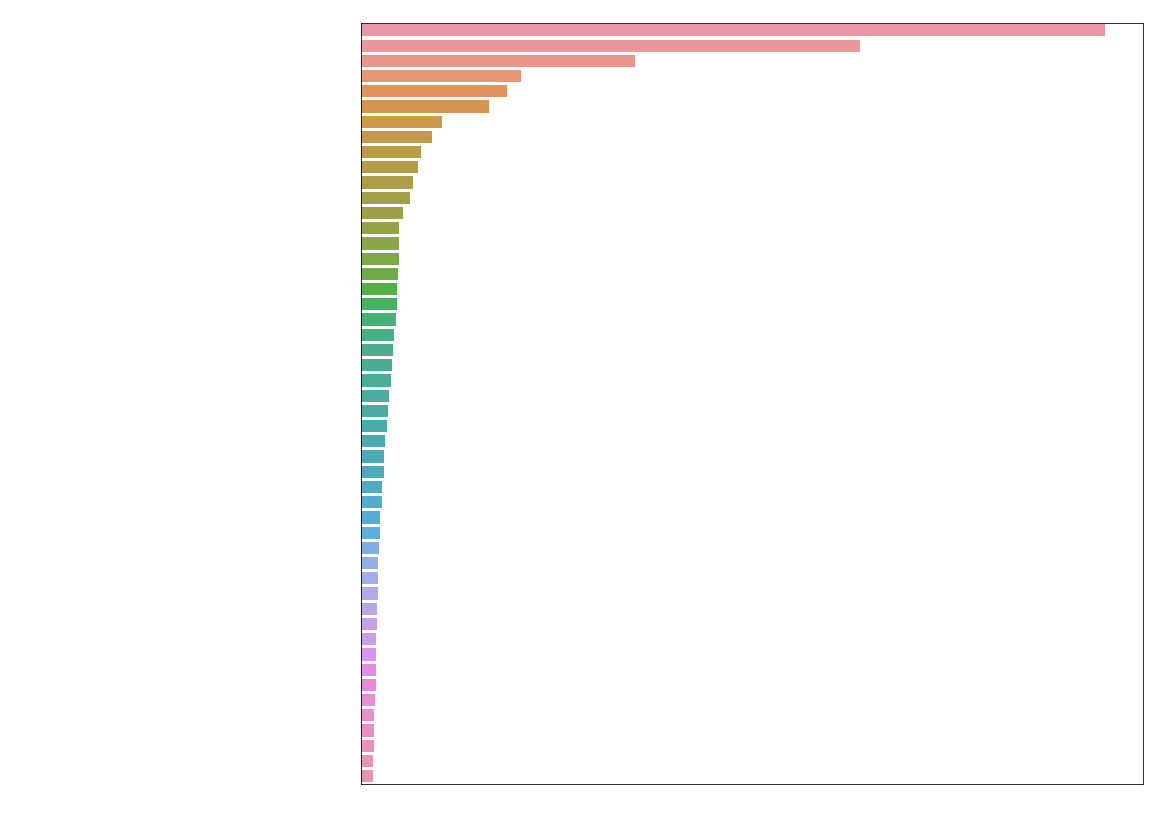

In [10]:
y = df.groupby("genres")['genres'].count().nlargest(50)
x = y.index 
 
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax = sns.barplot(x= y, y = x)
ax.set(title = 'Genres')
ax.set(xlabel = 'Quantity') 
ax.set(ylabel = '') 

plt.show()

- Thể loại drama/comedy là thể loại được sản xuất chủ yếu trong dataset (vị trí thứ 1 và 2)
- Phim với thể loại drama kết hợp comedy theo sau ở vị trí thứ 3.

=> Thể loại drama/comedy khá được ưu ái bởi các nhà sản xuất phim.

<?> Liệu khán giả có đón nhận những thể loại phim như thế này không? (Tính tổng doanh thu)


In [11]:
drama = comedy = dracome = 0
for i in range(len(df)):
    if df['genres'][i] == 'Drama,':
        drama += df['gross_worldwide'][i]
    if df['genres'][i] == 'Comedy,':
        comedy += df['gross_worldwide'][i]
    if df['genres'][i] == 'Comedy,Drama,':
        dracome += df['gross_worldwide'][i]

genres_gross = [drama, comedy, dracome]
for tl, dt in zip(['drama', 'comedy', 'drama, comedy'], genres_gross):
    print(tl, dt, '$')

drama 6298277722.0 $
comedy 14131645308.0 $
drama, comedy 7340333519.0 $


Thể loại riêng lẻ

In [12]:
genreList = getList('genres')
print(len(genreList), 'Gồm thể loại:')
for stt, genre in zip(range(0, len(genreList)), genreList):
    if stt+1 < 10:
        print(f"{stt+1}  {genre}")
    else:
        print(f"{stt+1} {genre}")

22 Gồm thể loại:
1  History
2  Music
3  Western
4  Romance
5  Drama
6  Crime
7  Adventure
8  Thriller
9  Family
10 Action
11 Sci-Fi
12 Comedy
13 Mystery
14 Musical
15 Animation
16 Horror
17 War
18 Biography
19 News
20 Sport
21 Reality-TV
22 Fantasy


Số lượng phim theo từng thể loại

Drama         11450
Comedy         7690
Thriller       3803
Romance        3487
Action         3078
Crime          2209
Adventure      1859
Horror         1804
Family         1656
Fantasy        1443
Mystery        1435
Animation      1159
Sci-Fi          981
Biography       875
History         839
Music           802
War             577
Sport           391
Musical         317
Western         122
News              2
Reality-TV        1
Name: genre, dtype: int64


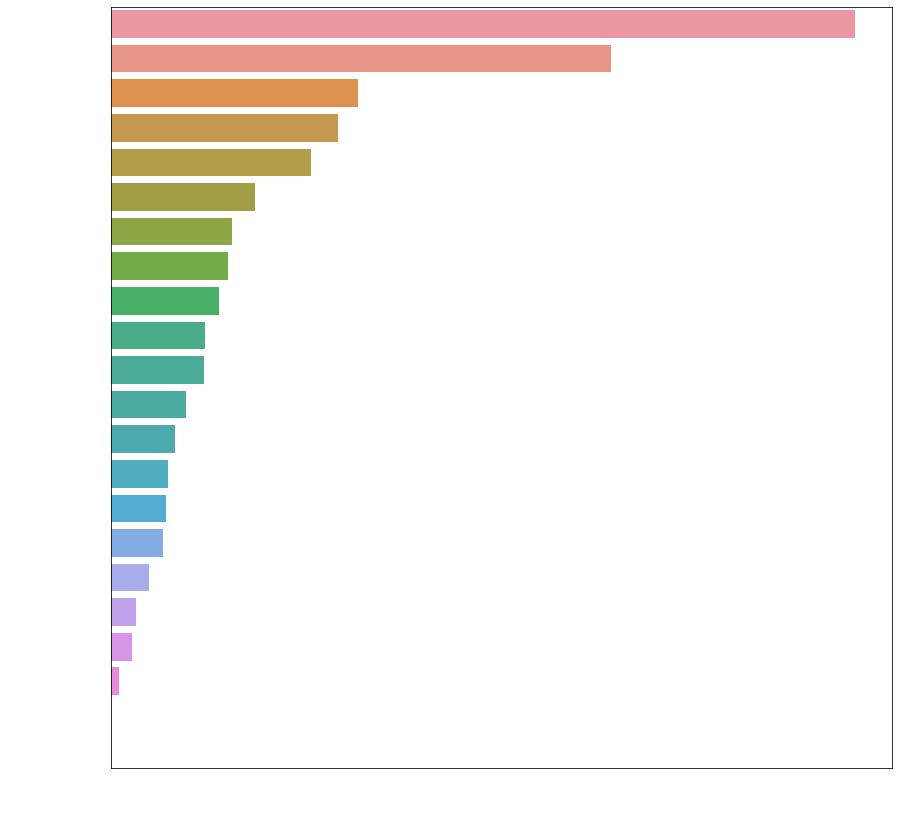

In [13]:
dataG = []
for genre in genreList:
    for line in df[df.genres.str.contains(genre, na=False)].values:
        dataG.append((line[0], genre, line[10], line[6], line[16]))  
dataG = pd.DataFrame(data=dataG, columns=['title', 'genre', 'gross', 'year', 'score'])
print(dataG.genre.value_counts())
plt.figure(figsize=(14, 14)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.countplot(y="genre",data=dataG, order=dataG.genre.value_counts().index[0:23])
plt.ylabel('Genres', fontsize=15) 
plt.xlabel('Count', fontsize=15) 
plt.show()

Top 3 thể loại phổ biến nhất: Drama, Comedy và Thriller với số lượng phim lần lượt là 11450, 7690 và 3803 phim.

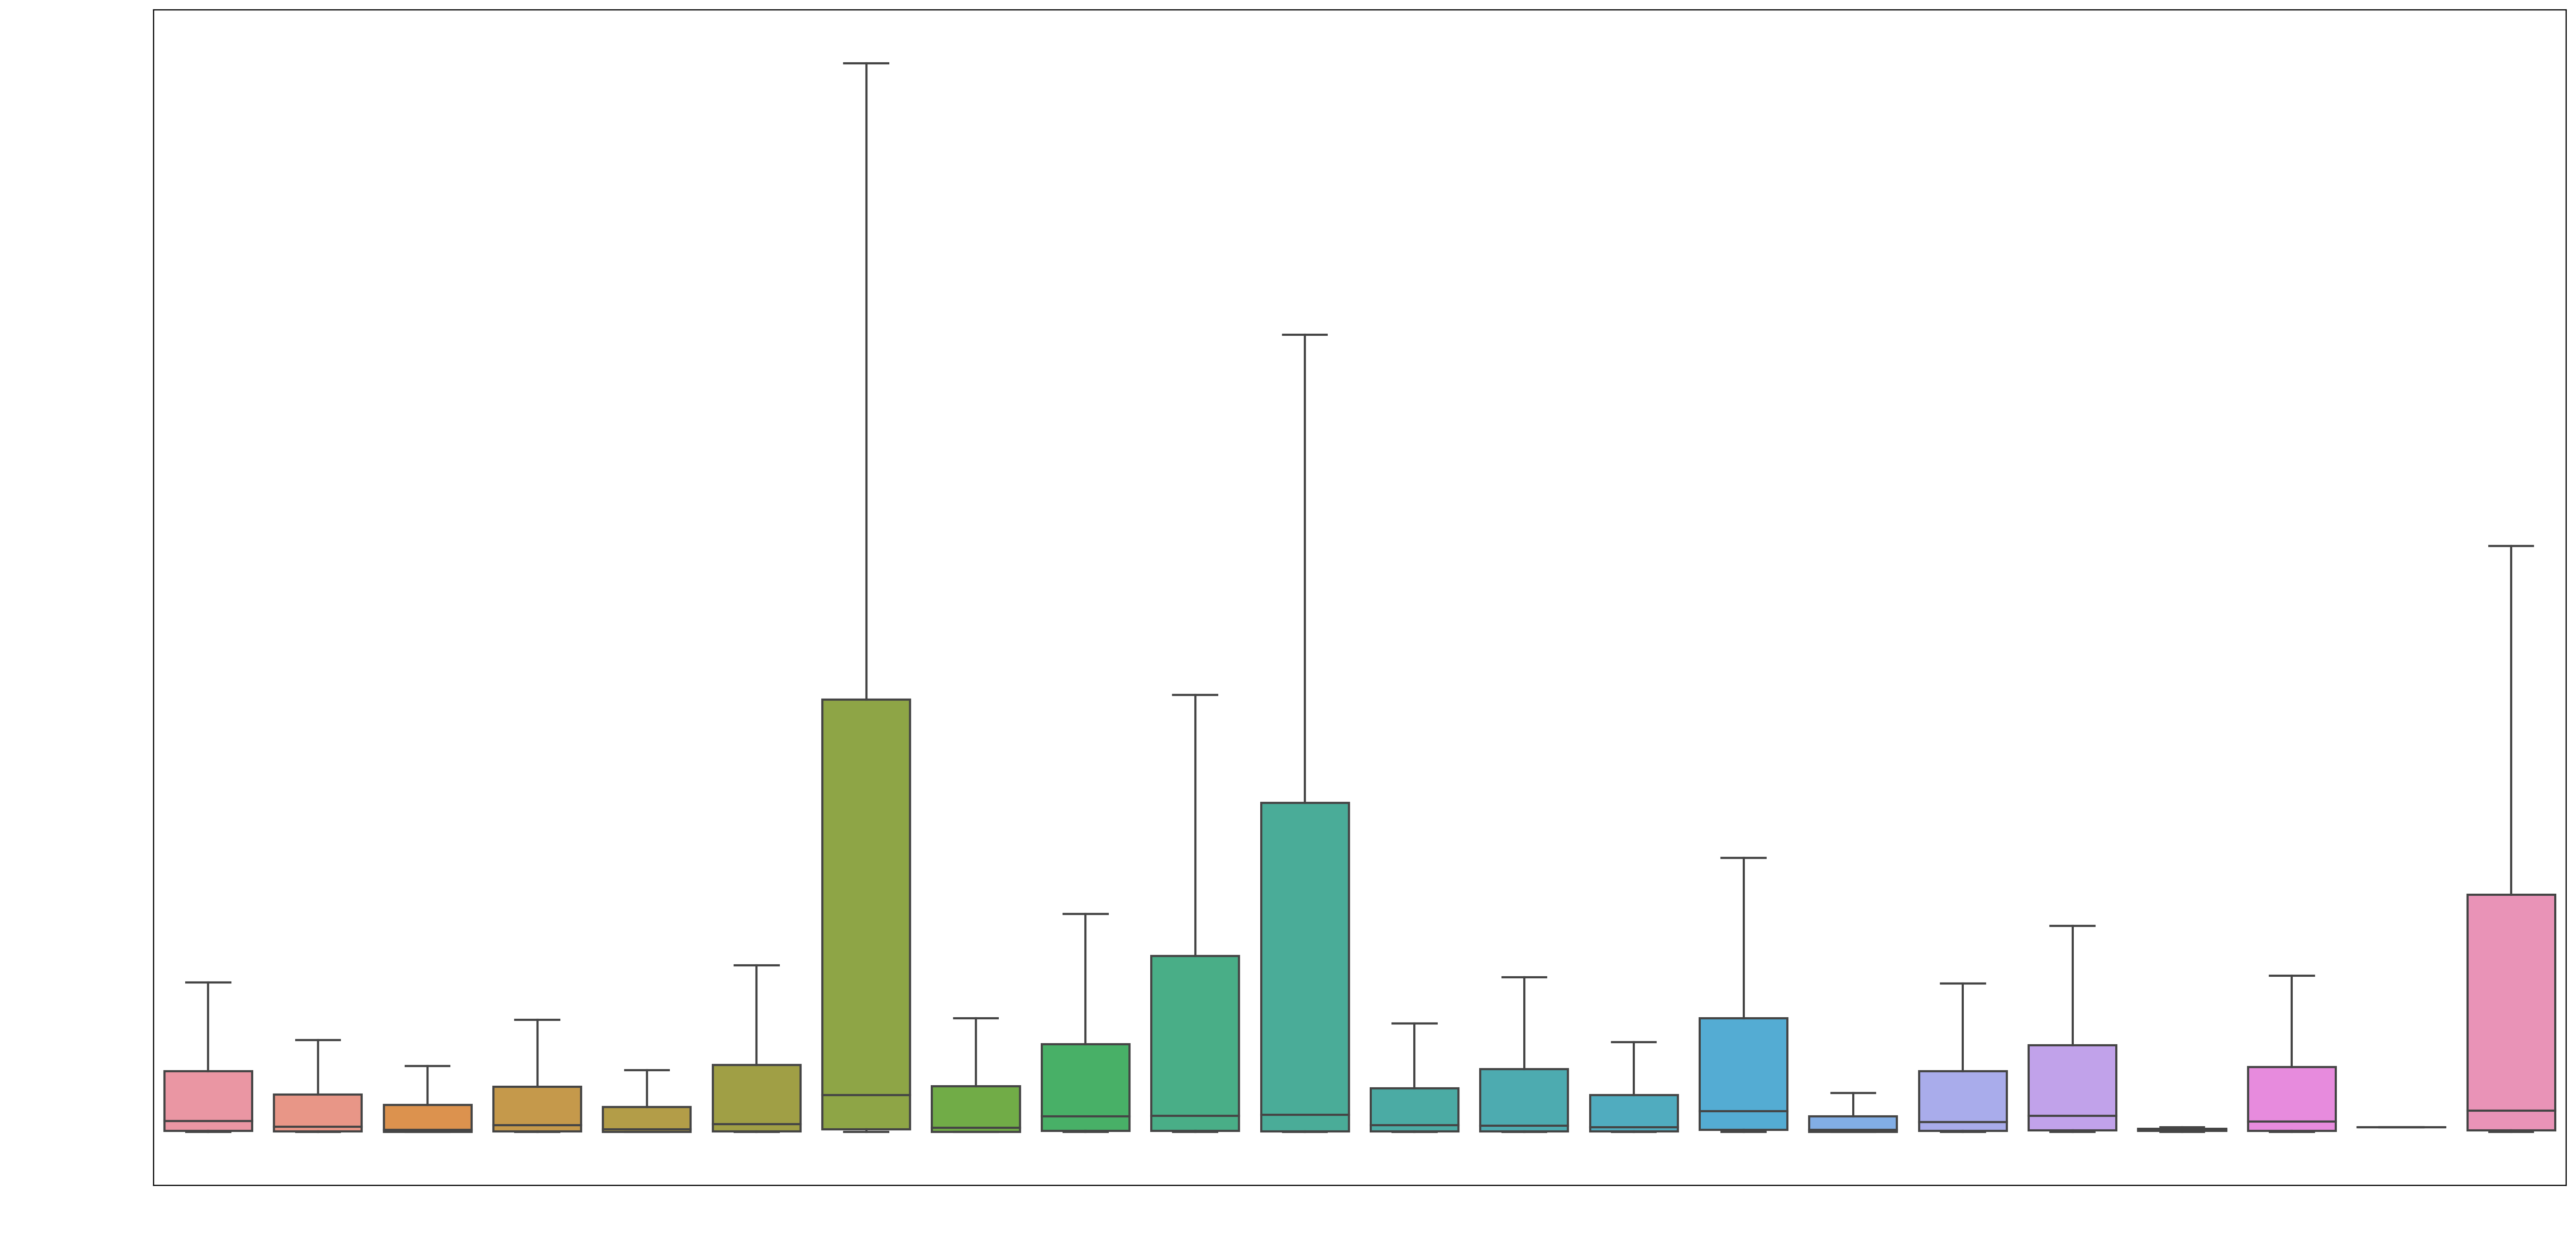

In [14]:
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
plt.ticklabel_format(style='plain', axis='y')
fig.set_dpi(200)
ax.xaxis.set_tick_params(labelsize='large')
ax.yaxis.set_tick_params(labelsize='large')
ax.xaxis.set_label_text(None, fontsize=20)   
ax.yaxis.set_label_text(None, fontsize=20)  
sns.boxplot(x='genre', y='gross', data=dataG, ax=ax, showfliers=False)
plt.show()

- Doanh thu phân bố không đều nhau giữa các thể loại.
- Các thể loại Adventure, Sci-Fi, Fantasy, Action có phân bố doanh thu trong các khoảng cao hơn các thể loại còn lại.

## Certificate

Số lượng chứng chỉ mỗi loại:
Unrated    2850
C13        2657
C16        1875
P           911
C18         592
Name: certificate, dtype: int64


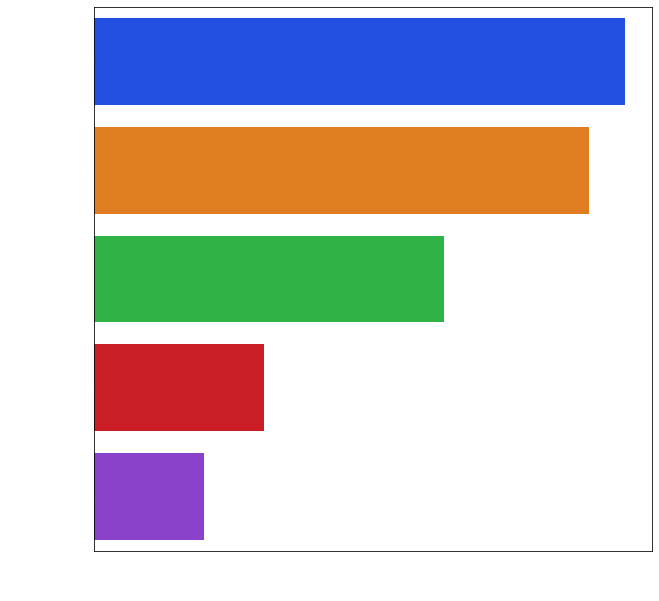

In [15]:
cert_size = df.groupby(['certificate'], dropna=False, as_index=False).size()
print('Số lượng chứng chỉ mỗi loại:') 
print(df.certificate.value_counts())
plt.figure(figsize=(10, 10))
sns.countplot(y="certificate",data=df, order=df.certificate.value_counts().index[0:5], palette='bright')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Số lượng', fontsize=15)
plt.ylabel('Certificate', fontsize=15) 
plt.show()

Phân bố

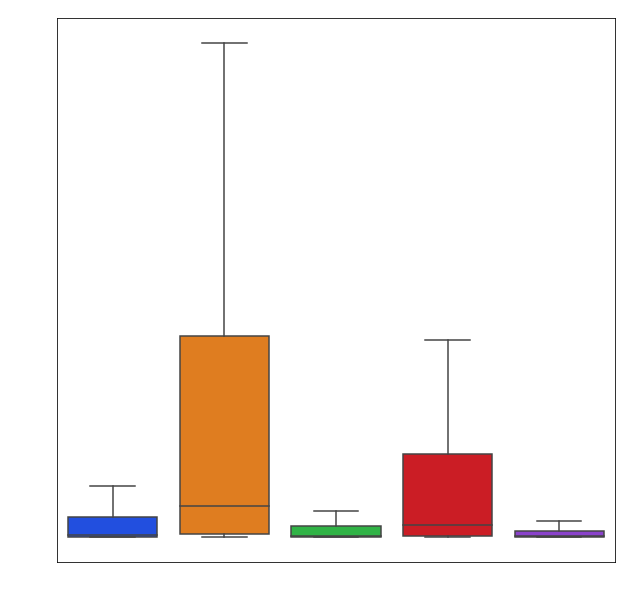

In [16]:
plt.figure(figsize=(10, 10))
sns.boxplot(x=df['certificate'], y=df['gross_worldwide'], data=df, showfliers = False, palette='bright')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Certificate', fontsize=15)
plt.ylabel('Gross', fontsize=15) 
plt.show()

- Phim với cert là C13 cho phân bố doanh thu lớn trong bộ dữ liệu.
- Trong khi đó phim với cert là P lại có phân bố doanh thu thấp hơn so với C13. 
(cert P là dành cho mọi lứa tuổi trong khi cert C13 là độ tuổi từ 13 trở lên)

## Release date

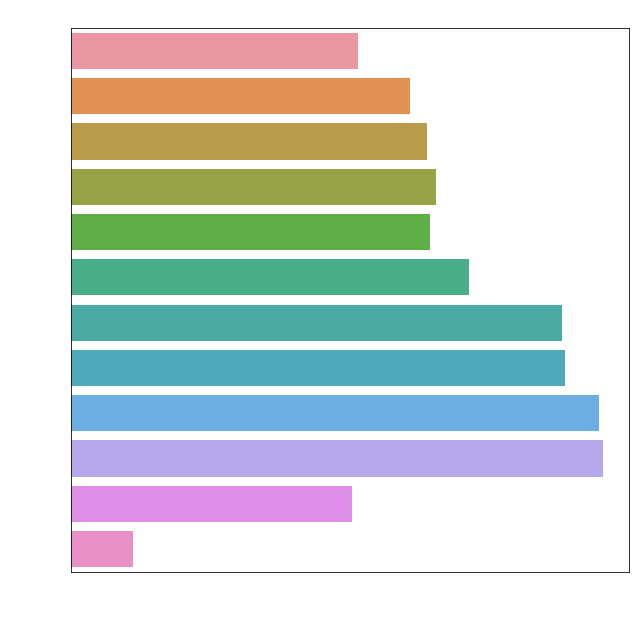

In [17]:
plt.figure(figsize=(10, 10))
sns.countplot(y="release_date",data=df, order=[x for x in range(2010, 2022)])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.title('Yearly Analysis', fontsize= 20)
plt.ylabel('Year', fontsize=15) 
plt.show()

Nhận xét
- Số lượng phim tăng dần từ nằm 2010 - 2019
- Năm 2020 số lượng phim giảm mạnh có thể là do đại dịch

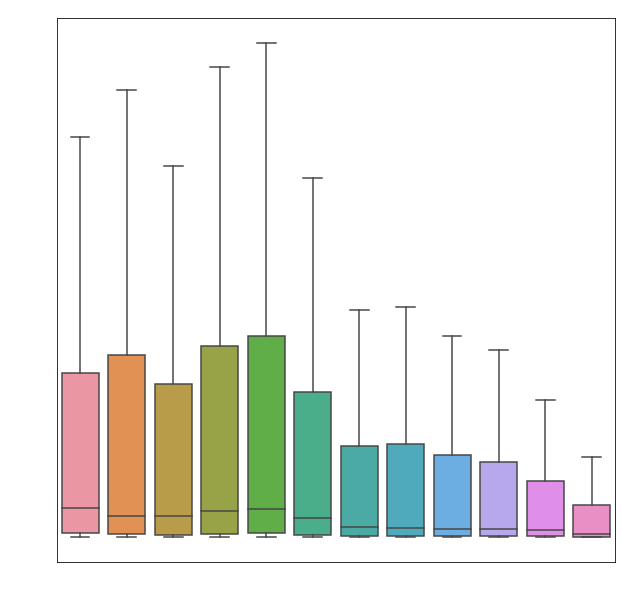

In [18]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=df["gross_worldwide"], x=df["release_date"],
            showfliers=False, order=[x for x in range(2010, 2022)])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Density', fontsize=15) 
plt.show()

*   Doanh thu trong khoảng thời gian [2010,2015] có sự phân bố khá là tương đồng và có sự giao động lớn.
*   Doanh thu trong khoảng thời gian [2016,2020] có sự phân bố khá là 
tương đồng và có xu hướng thấp hơn và ít giao động doanh thu của nhóm [2010,2015]. (Có thể là do giai đoạn này công nghệ đã phát triển, internet có khắp mọi nơi nên người xem không cần phải lên rạp mà có thể chờ có trên internet rồi coi để giảm chi phí nên doanh thu thấp hơn so với giai đoạn trước). 

## Countries

In [19]:
df.countries_of_origin.sample(1)

11291    Argentina,Brazil,
Name: countries_of_origin, dtype: object

In [20]:
cList = getList('countries_of_origin')
print(f'Đến từ {len(cList)} quốc gia:')
for stt, con in zip(range(0, len(cList)), cList):
    if stt+1 < 10:
        print(f"{stt+1}  {con}")
    else:
        print(f"{stt+1} {con}")

Đến từ 161 quốc gia:
1  Slovenia
2  Namibia
3  Indonesia
4  Costa Rica
5  Tunisia
6  Brazil
7  Vanuatu
8  Luxembourg
9  The Democratic Republic of Congo
10 Guadeloupe
11 Rwanda
12 Guatemala
13 Bhutan
14 Lebanon
15 Dominica
16 Russia
17 Antarctica
18 Syria
19 Ethiopia
20 Colombia
21 Albania
22 Denmark
23 Laos
24 Malaysia
25 Austria
26 Norway
27 Ghana
28 Tanzania
29 Cyprus
30 Gambia
31 Bulgaria
32 Bolivia
33 China
34 Thailand
35 Qatar
36 Western Sahara
37 Bosnia and Herzegovina
38 Philippines
39 United Arab Emirates
40 Ukraine
41 Zambia
42 Chad
43 Congo
44 Kyrgyzstan
45 Iran
46 Netherlands Antilles
47 Argentina
48 India
49 Kazakhstan
50 Belarus
51 Benin
52 Latvia
53 Malta
54 Kuwait
55 Cayman Islands
56 Occupied Palestinian Territory
57 Djibouti
58 Canada
59 Greece
60 Bangladesh
61 Puerto Rico
62 Bahrain
63 Romania
64 Australia
65 Cuba
66 South Africa
67 Jordan
68 Iraq
69 Montenegro
70 Georgia
71 Venezuela
72 Liechtenstein
73 Morocco
74 Sudan
75 Côte d'Ivoire
76 Italy
77 Mongolia
78 Mozam

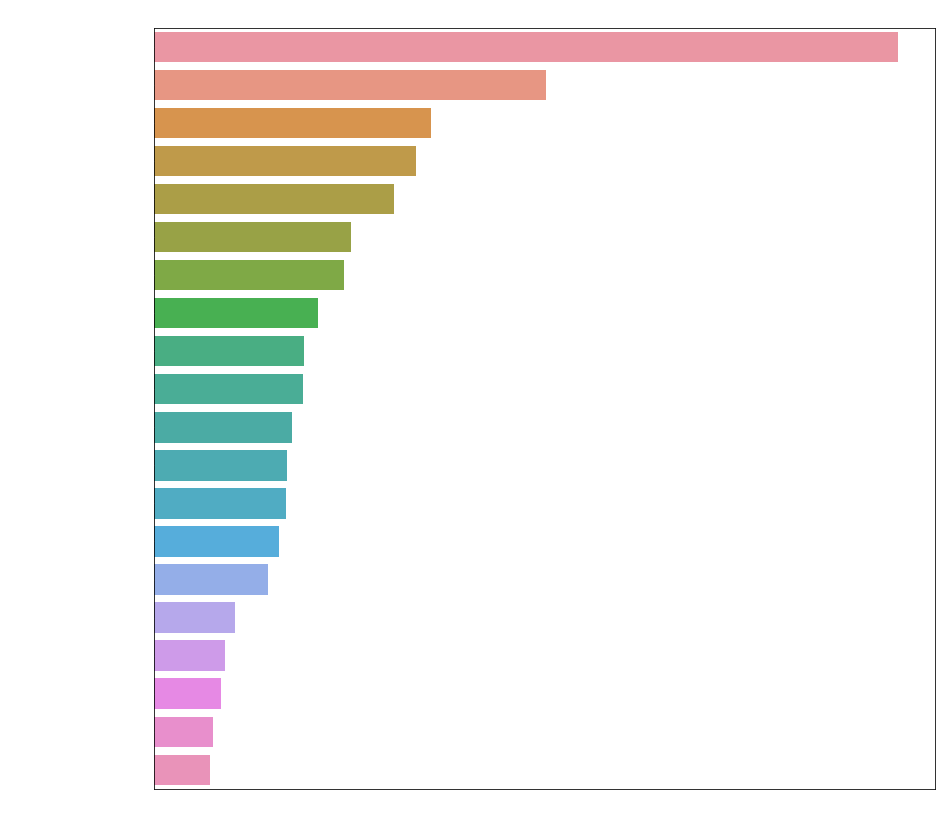

In [21]:
dataC = []
for con in cList:
    for line in df[df.countries_of_origin.str.contains(con, na=False)].values:
        dataC.append((line[0], con, line[10]))  
dataC = pd.DataFrame(data=dataC, columns=['title', 'country', 'gross'])
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Country', fontsize=15) 
plt.title('Top 20 country', fontsize=20)
sns.countplot(y="country",data=dataC, order=dataC.country.value_counts().index[0:20])
plt.show()

Nhận xét 3 quốc gia tham gia sản xuất nhiều phim nhất là US, France và kế tiếp là India

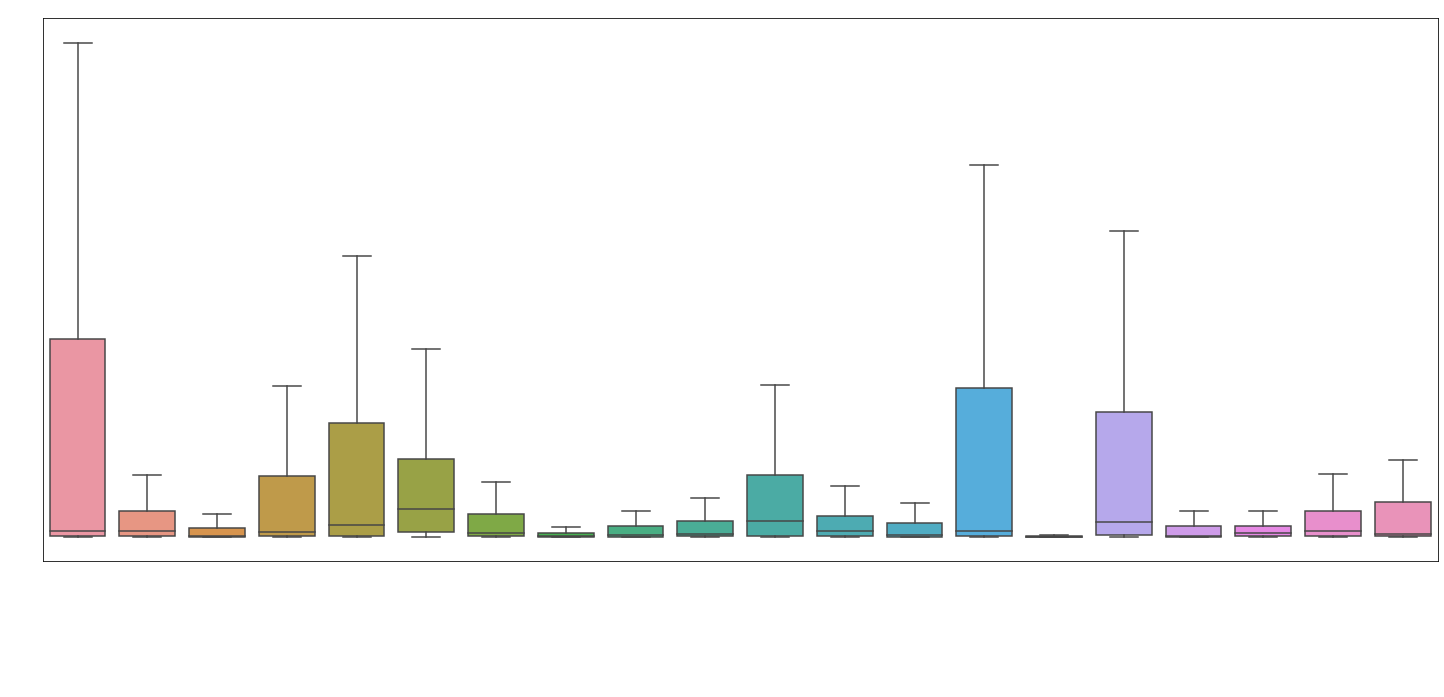

In [22]:
plt.figure(figsize=(25, 10))
sns.boxplot(y=dataC["gross"], x=dataC.country,
            showfliers=False, order=dataC.country.value_counts().index[0:20])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=50)
plt.xlabel('Countries', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Nhận xét giữa các quốc gia có sự chênh lệch về  phân bố doanh thu

## Languages

In [23]:
df.languages.sample(1)

15702    Italian,
Name: languages, dtype: object

In [24]:
lList = getList('languages')
print(f'Gồm {len(lList)} ngôn ngữ:')
for stt, lang in zip(range(0, len(lList)), lList):
    if stt+1 < 10:
        print(f"{stt+1}  {lang}")
    else:
        print(f"{stt+1} {lang}")

Gồm 228 ngôn ngữ:
1  Polynesian
2  Tamil
3  None
4  Bambara
5  Shanghainese
6  Algonquin
7  Tswana
8  Somali
9  German Sign Language
10 Lingala
11 Slovenian
12 Norwegian
13 Kashmiri
14 Kabyle
15 Zulu
16 Yakut
17 Berber languages
18 Sotho
19 Yoruba
20 Chechen
21 Purepecha
22 Dinka
23 Punjabi
24 Kurdish
25 Wayuu
26 Kannada
27 Central American Indian languages
28 Faroese
29 Albanian
30 Latin
31 Bosnian
32 Afrikaans
33 Micmac
34 Nushi
35 Greenlandic
36 Mandingo
37 Tamashek
38 German
39 Rajasthani
40 Romanian
41 North American Indian
42 Dutch
43 Pashtu
44 Azerbaijani
45 Slovak
46 Assamese
47 Lao
48 Italian
49 Konkani
50 Finnish
51 Samoan
52 Sicilian
53 Sinhala
54 Korean Sign Language
55 Maya
56 Sumerian
57 Latvian
58 Japanese
59 Croatian
60 Mandarin
61 Brazilian Sign Language
62 Papiamento
63 Chaozhou
64 Kirundi
65 Assyrian Neo-Aramaic
66 Abkhazian
67 Min Nan
68 Esperanto
69 Tulu
70 Egyptian (Ancient)
71 Mixtec
72 Serbo-Croatian
73 Ukrainian
74 Pawnee
75 Tajik
76 Belarusian
77 Himachali
78 

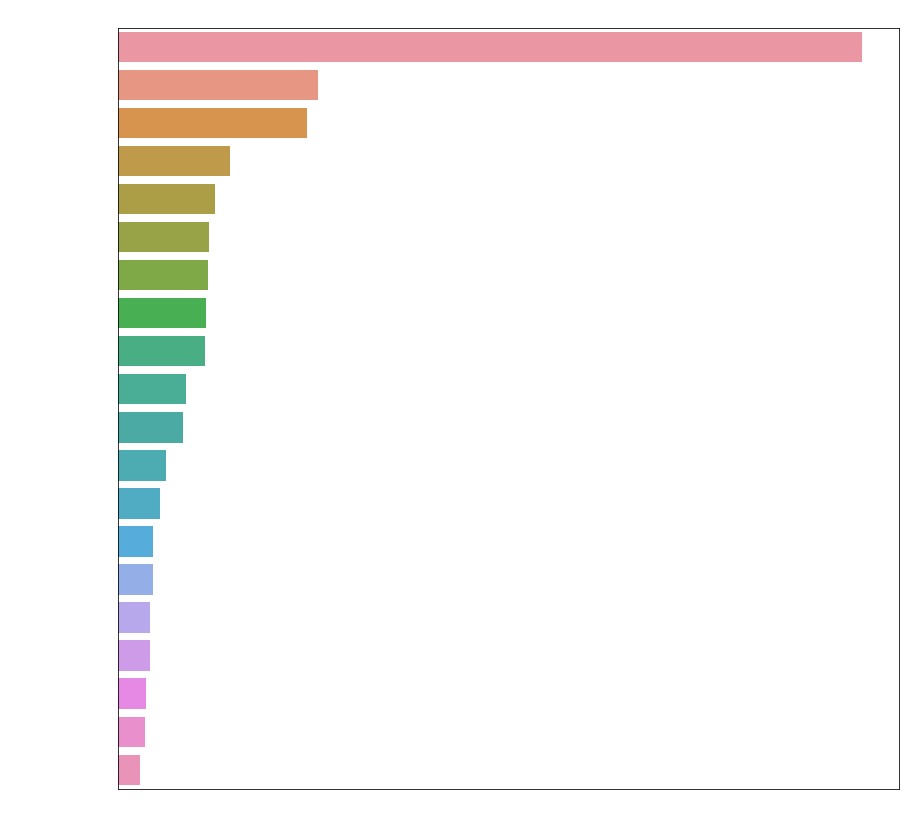

In [25]:
dataL = []
for lang in lList:
    for line in df[df.languages.str.contains(lang, na=False)].values:
        dataL.append((line[0], lang, line[10]))  
dataL = pd.DataFrame(data=dataL, columns=['title', 'language', 'gross'])
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('Languages', fontsize=15)
plt.title('Top 20 used languages', fontsize=20)
dataL.language.value_counts()
sns.countplot(y="language",data=dataL, order=dataL.language.value_counts().index[0:20])
plt.show()

Hầu hết các phim khi ra rạp đều có ngôn ngữ là tiếng Anh

In [26]:
def plot_lang(showFliers):
    plt.figure(figsize=(25, 10))
    sns.boxplot(y=dataL["gross"], x=dataL["language"],
                showfliers=showFliers, order=dataL.language.value_counts().index[0:20])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Languages', fontsize=15)
    plt.ylabel('Gross', fontsize=15)
    plt.show()

interact(plot_lang, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

- Có sự khác biệt về phân bố doanh thu giữa các loại ngôn ngữ
- Phim có hỗ trợ ngôn ngữ l2 Mandarin, Cantonese, Chinese, Korean, Janpanese có phân bố cao hơn

Số lượng ngôn ngữ ảnh hưởng như thế nào đến doanh thu phim

In [27]:
df_num = pd.DataFrame(dataL["title"].value_counts(
).rename_axis('title').reset_index(name='count'))

result = pd.merge(dataL, df_num, on="title").drop_duplicates(
    'title', keep='last').drop(columns=['language'])
print('Phim có nhiều ngôn ngữ nhất: ')
result[result['count'] == result['count'].max()][['title', 'count']]

Phim có nhiều ngôn ngữ nhất: 


title  count
255  The Jungle Book     18
616   Testing Movie1     18

Phân bố của số lượng ngôn ngữ phim

In [28]:
result['count'].value_counts()

1     15243
2      3391
3      1203
4       468
5       180
6        68
7        23
8         8
9         5
18        2
11        2
10        1
Name: count, dtype: int64

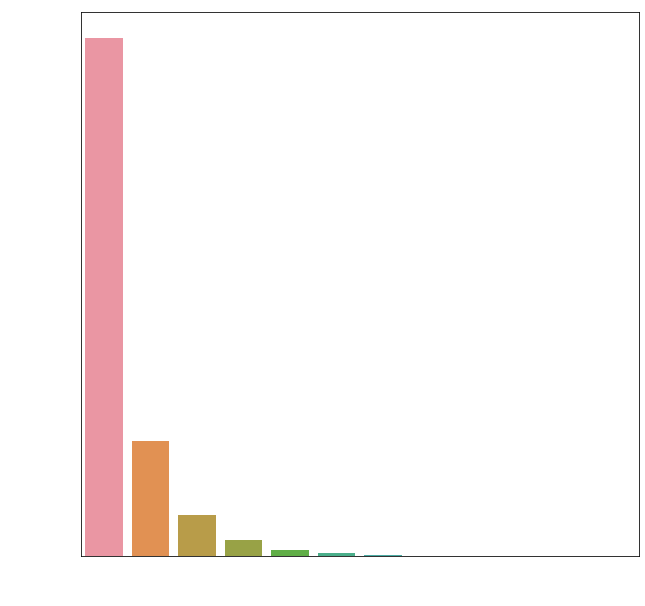

In [29]:
plt.figure(figsize=(10, 10))
sns.countplot(x='count', data=result)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Số lượng ngôn ngữ', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Nhận xét phần lớn là phim chỉ hỗ trợ một ngôn ngữ

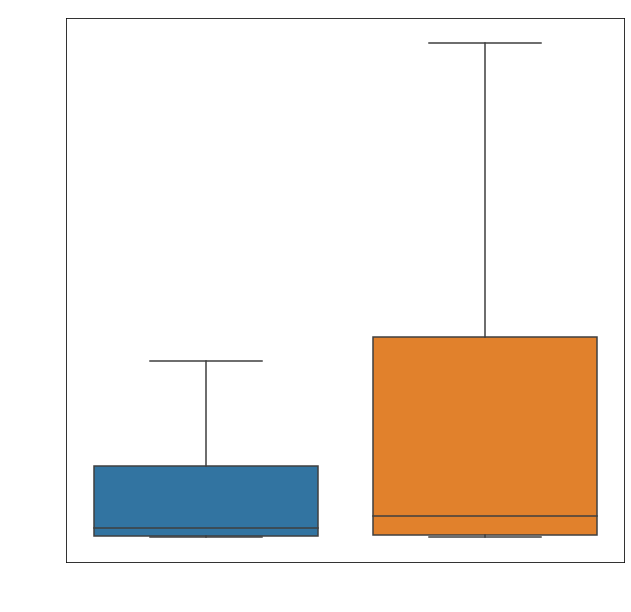

In [30]:
plt.figure(figsize=(10, 10))
sns.boxplot(y=result["gross"], x=result['count'] > 1, showfliers=False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Có nhiều hơn một ngôn ngữ?', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Việc nhiều hơn một 1 ngữ có thể ảnh hưởng đến doanh thu.

In [31]:
print('Hệ số tương quan giữa số lượng ngôn ngữ và doanh thu:', result.corr()['gross']['count'])

Hệ số tương quan giữa số lượng ngôn ngữ và doanh thu: 0.13512978907479498


=> Gần như không có sự tương quan

## Meta score

Regplot

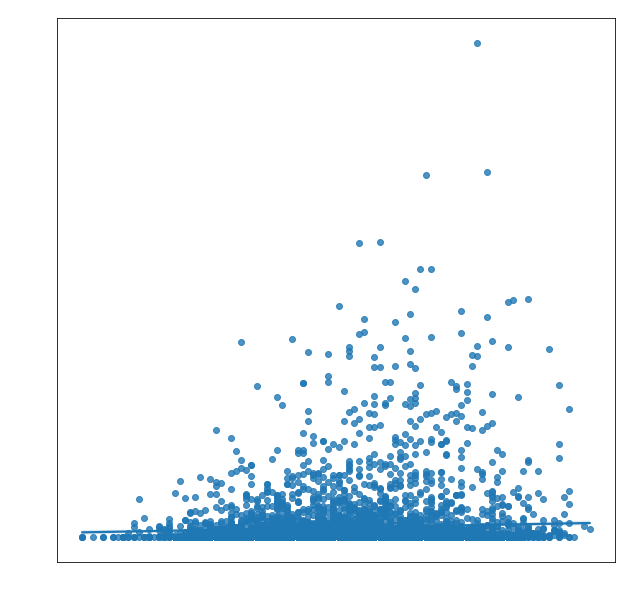

In [32]:
plt.figure(figsize=(10, 10)) 
sns.regplot(x='metascore', y='gross_worldwide', data=df)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Metascore', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [33]:
df.corr()['gross_worldwide']['metascore']

0.05572804049631602

## Runtime

In [34]:
print('- Phim có thời lượng lớn nhất:', df[['title', 'runtime']][df['runtime'] == df['runtime']
                                                            .max()].to_string(index=False, header=False))
print('- Phim có thời lượng nhỏ nhất nhất:\n', df[['title', 'runtime']][df['runtime'] == df['runtime']
                                                            .min()].to_string(index=False, header=False))
print('- Thời lượng phim trung bình:', df['runtime'].mean())
print('- Thời lượng phim trung vị:', df['runtime'].median()) 

- Phim có thời lượng lớn nhất: La flor 808.0
- Phim có thời lượng nhỏ nhất nhất:
 Ernest et Célestine en hiver 45.0
                   Cassandra 45.0
        Qing zhou shan shang 45.0
                     45 Days 45.0
    MULT v kino. Vypusk # 16 45.0
                 Free Spirit 45.0
- Thời lượng phim trung bình: 103.77373029772329
- Thời lượng phim trung vị: 100.0


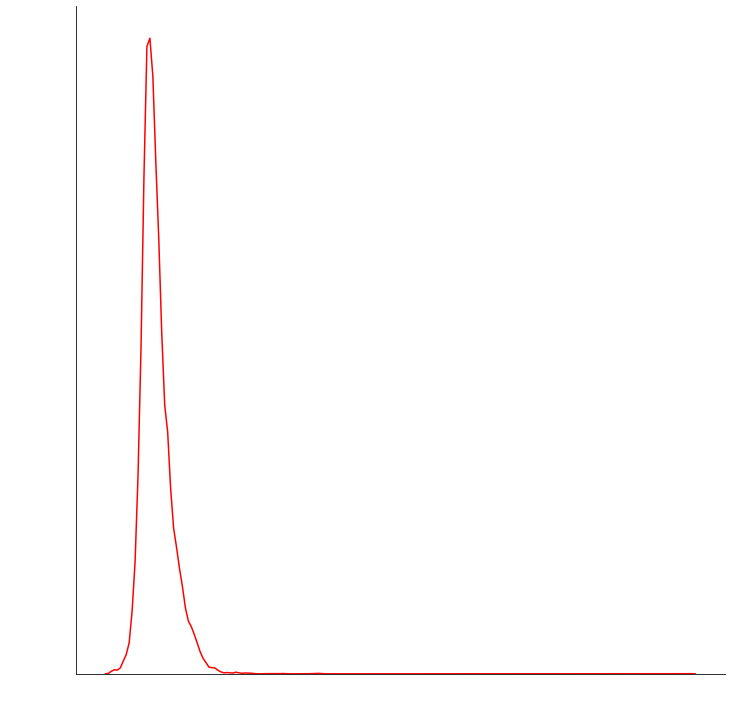

In [35]:
sns.displot(x='runtime', data=df, kind="kde", height=10 , aspect = 1, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

In [36]:
def rt_plot(showfliers):
    plt.figure(figsize=(10, 10)) 
    sns.boxplot(x='runtime', data=df, showfliers=showfliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Runtime', fontsize=15)
    plt.ylabel('Density', fontsize=15)
    plt.show()
    
interact(rt_plot, showfliers=[False, True])
pass

interactive(children=(Dropdown(description='showfliers', options=(False, True), value=False), Output()), _dom_…

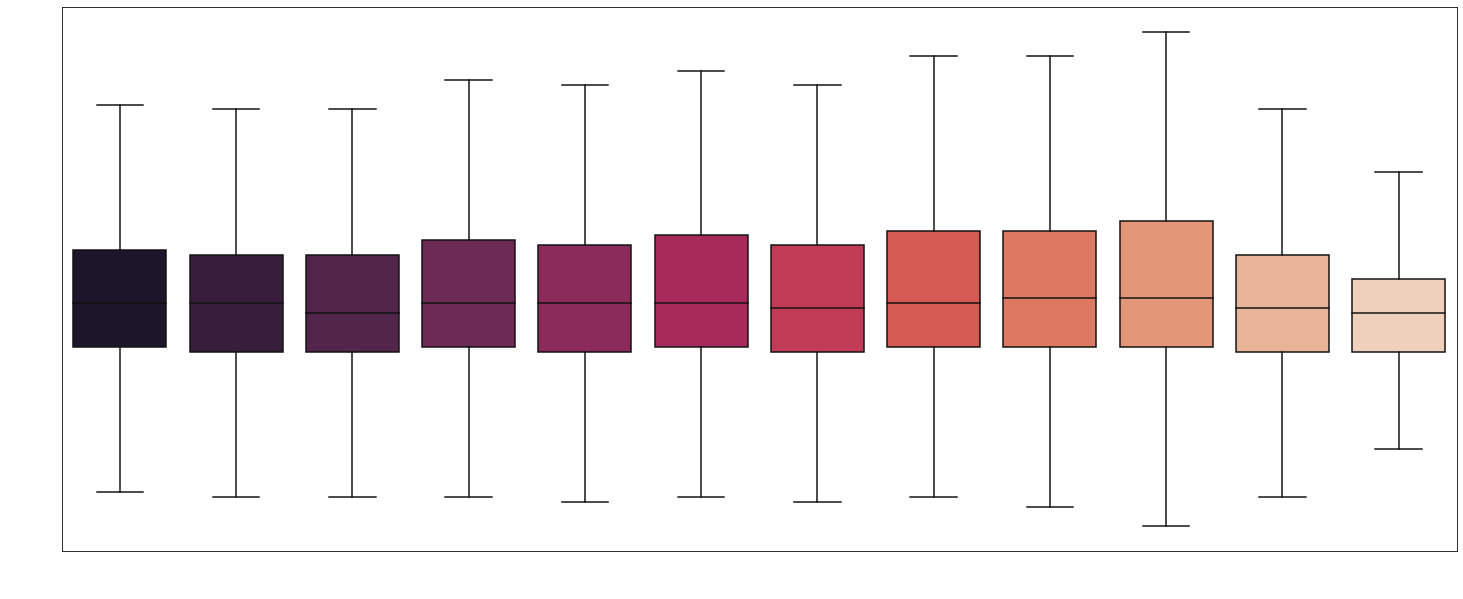

In [37]:
plt.figure(figsize=(25, 10))
sns.boxplot(y=df['runtime'], x=df['release_date'], data=df, showfliers = False, palette='rocket')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Runtime', fontsize=15)
plt.show()

Thời lượng phim trong 10 năm không có quá nhiều sự thay đổi, tuy nhiên vào năm 2019 thì phim có thời lượng cao hơn tương đối so với những năm còn lại.

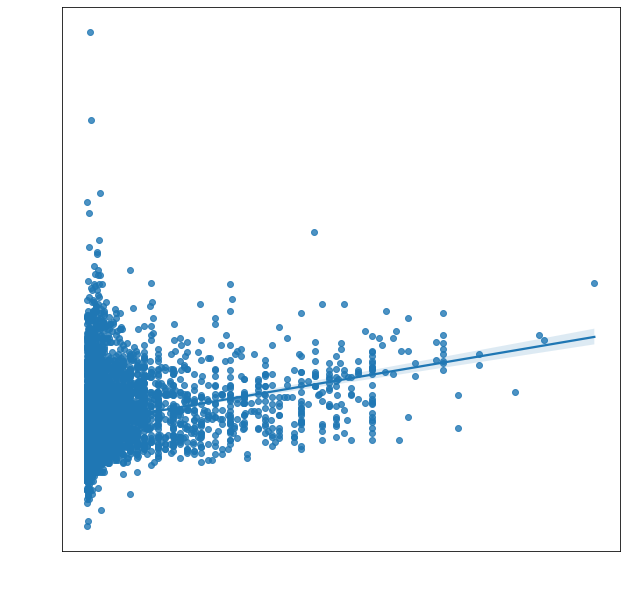

In [38]:
plt.figure(figsize=(10, 10))
sns.regplot(y="runtime", x="budget", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Runtime', fontsize=15)
plt.show()

Thời lượng phim có quan hệ với chi phí đầu tư vào phim khi ta thấy rằng:
- Phim với sự đầu tư càng lớn thì thời lượng càng cao: Đòi hỏi chi phí cho các phân cảnh quay, hậu kì nhiều hơn.
- Phương sai (runtime) của phim với chi phí thấp thì cao và giảm dần khi chi phí tăng.

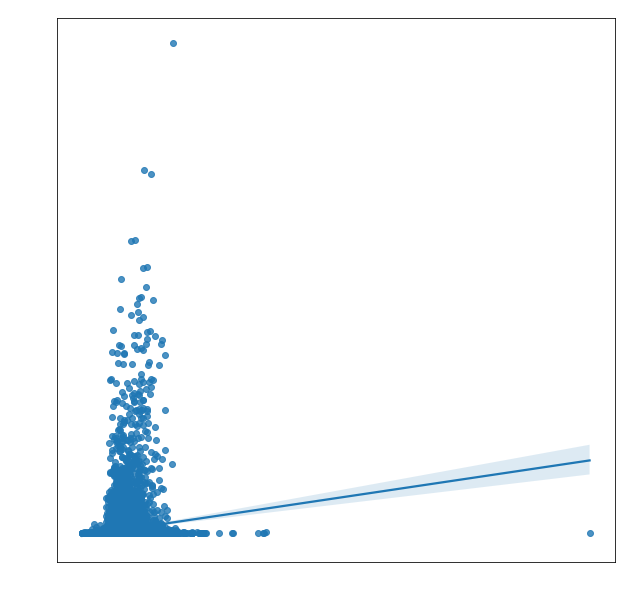

In [39]:
plt.figure(figsize=(10, 10)) 
sns.regplot(y="gross_worldwide", x="runtime", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Runtime', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [40]:
df.corr()['gross_worldwide']['runtime']

0.13109052508076918

=> Gần như không có sự tương quan

## Budget
https://www.xe.com/currencyconverter/

Regplot

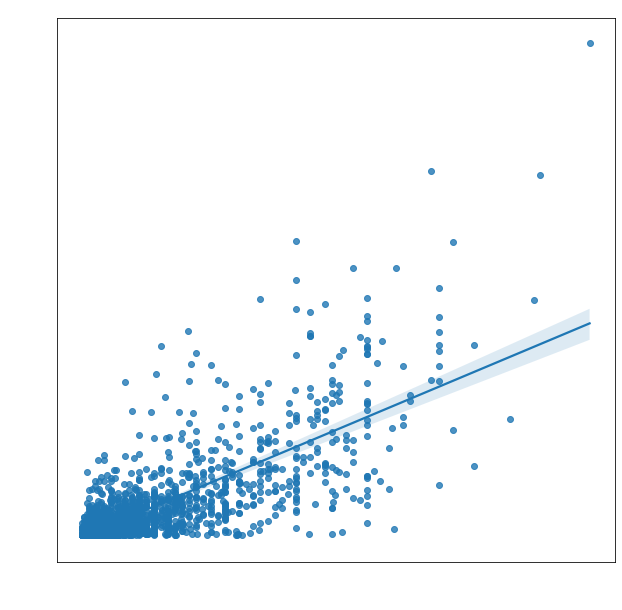

In [41]:
plt.figure(figsize=(10, 10))
sns.regplot(x="budget", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Đồ thi cho thấy tương quan giữa budget và gross_worldwide là lớn. Ta đi tính correlation giữa 2 thuộc tính.

In [42]:
df.corr()['gross_worldwide']['budget']

0.8016273900516061

Kết quả trả về là 0.8016273900516061. Đây là mức tương quan đồng thuận mạnh đúng như dự đoán.

## Aspect Ratio

Số lượng loại

In [43]:
df['aspect_ratio'].value_counts().shape[0]

53

In [44]:
df['aspect_ratio'].value_counts()

2.35:1         5798
1.85:1         2797
2.39:1         1595
1.78:1          816
1.66:1          101
1.33:1           72
2.00:1           53
1.37:1           39
2.40:1           23
2:1              22
2.66:1           22
2.20:1           16
1.90:1           14
2.55:1            8
2.4:1             7
1.50:1            5
2.76:1            5
2:39              5
1:1               4
1.55:1            4
cinemascope       3
2.11:1            2
1.89:1            2
2.25:1            2
3:1               2
2.10:1            2
2.41:1            1
1.95:1            1
1.77:1            1
1:66              1
2.37:1            1
1.61:1            1
circular          1
1.00:1            1
1.56:1            1
2.22:1            1
1.20:1            1
2.2:1             1
tondoscope        1
2.16:1            1
1:1.85            1
2.21:1            1
3.66:1            1
1.40:1            1
2.38:1            1
3.2:1             1
2.77:1            1
2.80:1            1
2.12:1            1
1.90.1            1


circular

In [45]:
df[df.aspect_ratio=='circular']['title']

16091    Wo bu shi Pan Jin Lian
Name: title, dtype: object

https://www.imdb.com/title/tt5918090/mediaindex/?ref_=tt_mi_sm

tondoscope

In [46]:
df[df.aspect_ratio=='tondoscope'][['title', 'countries_of_origin']]


title countries_of_origin
5671  Lucifer     Mexico,Belgium,

https://www.imdb.com/title/tt4131206/mediaindex/?ref_=tt_mi_sm

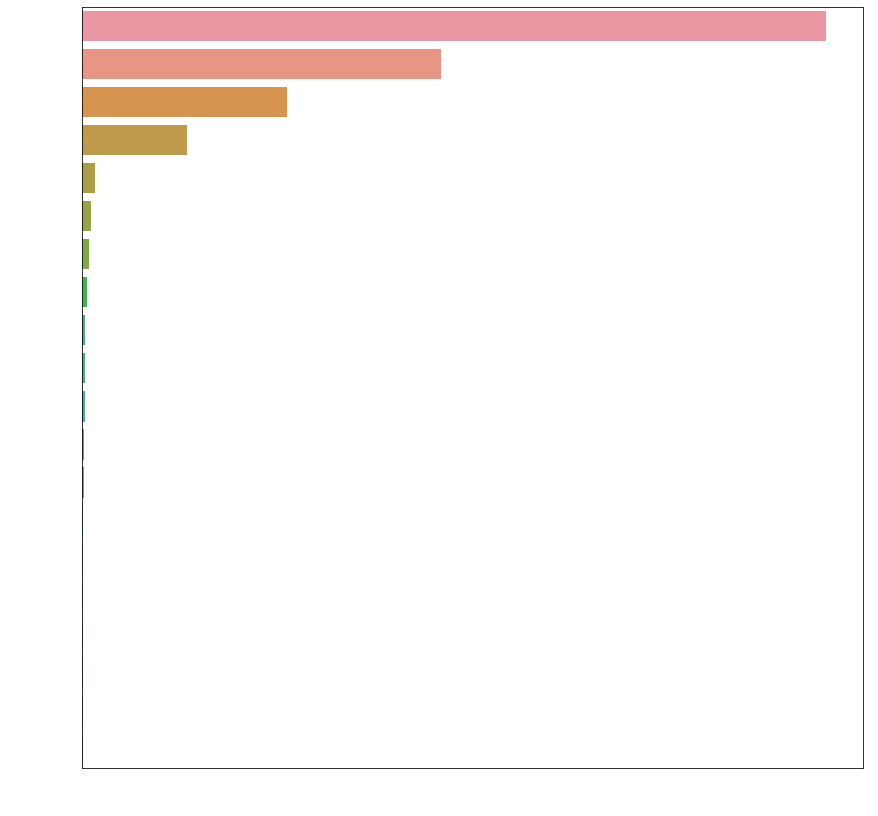

In [47]:
plt.figure(figsize=(14, 14))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=15)
plt.ylabel('AR', fontsize=15) 
sns.countplot(y="aspect_ratio",data=df, order=df.aspect_ratio.value_counts().index[0:20])
plt.show()

Regplot

In [48]:
def ar_plot(showFliers):
    plt.figure(figsize=(25, 14))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Count', fontsize=15)
    plt.ylabel('Country', fontsize=15) 
    sns.boxplot(y=df["gross_worldwide"], x=df["aspect_ratio"],
                showfliers=showFliers, order=df.aspect_ratio.value_counts().index[0:20])
    plt.show()
    
interact(ar_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim sử dụng tỷ lệ khung hình là 2.55

In [49]:
df[df.aspect_ratio == '2.55:1'][['title', 'gross_worldwide']]

title  gross_worldwide
208                    La La Land      448906865.0
5185                Hou hui wu qi      100125957.0
18685  Feng kuang de wai xing ren      327598891.0
18971               My Father Die           4252.0
20176           Fei chi ren sheng      255863112.0
21439             Liu lang di qiu      699992512.0
21976     Aimer, boire et chanter        2423379.0
22038                    Viktoria          11314.0

## Score

Phân bố 

In [50]:
def score_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.score,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Score', fontsize=15)
    plt.show()



interact(score_box_plot, showFliers=[True, False])
pass

interactive(children=(Dropdown(description='showFliers', options=(True, False), value=True), Output()), _dom_c…

Regplot

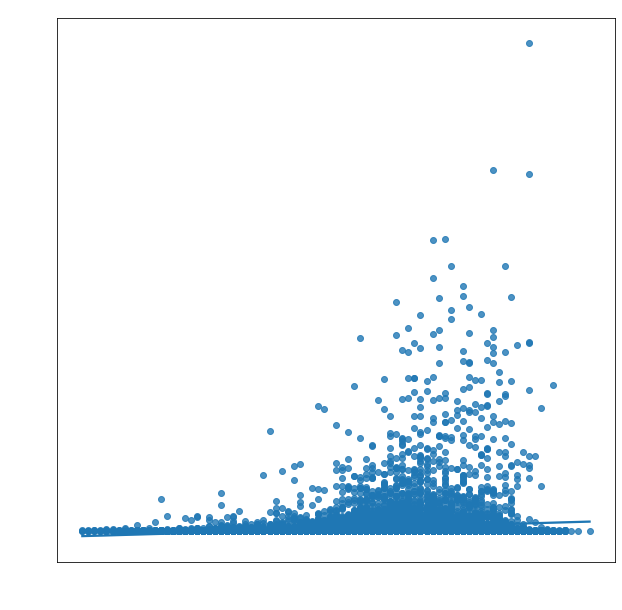

In [51]:
plt.figure(figsize=(10, 10))
sns.regplot(x="score", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [52]:
df.corr()['gross_worldwide']['score']

0.1296968109051146

## Votes (nghìn người)

In [53]:
def vote_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.votes,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Votes', fontsize=15)
    plt.show()



interact(vote_box_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim có số điểm đánh giá cao nhất

In [54]:
df[df.score == df.score.max()]

title                                   casts  \
3643  Amudhan aka Sinamkol  Aravindhan,Sinthar Athith,Leelawathy,,   

            directors         writers  genres certificate  release_date  \
3643  Ranjith Joseph,  Theepachelvan,  Drama,         NaN        2020.0   

     countries_of_origin languages                    production_companies  \
3643    India,Sri Lanka,    Tamil,  Bakialakhmi Talkies,Skymagic Pictures,   

      ...  budget  runtime  color sound_mix aspect_ratio score  votes  \
3643  ...     NaN    121.0  Color      DTS,          NaN   9.4  0.059   

      user_reviews  critic_reviews  metascore  
3643           3.0             2.0        NaN  

[1 rows x 21 columns]

Regplot

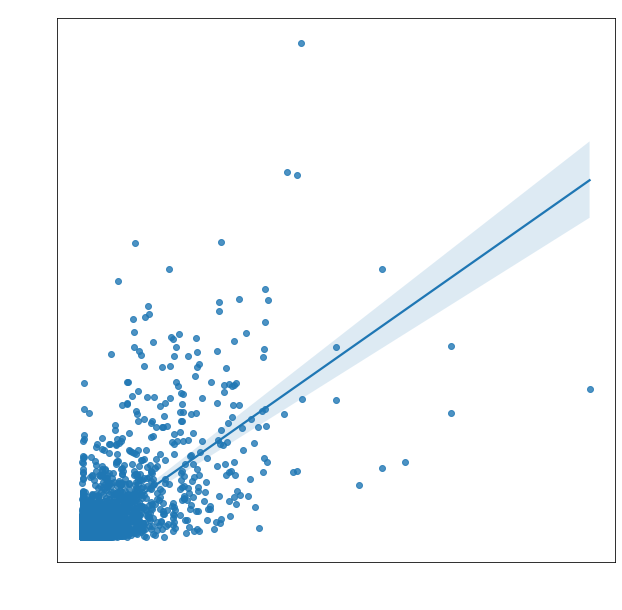

In [55]:
plt.figure(figsize=(10, 10))
sns.regplot(x="votes", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('Votes', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [56]:
df.corr()['gross_worldwide']['votes']

0.7231502613872525

## User reviews (người)

Phân bố

In [57]:
def ur_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.user_reviews,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('user_reviews', fontsize=15)
    plt.show()



interact(ur_box_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim có lượt đánh giá nhiều nhất

In [58]:
df[df.user_reviews == df.user_reviews.max()]

title                                         casts       directors  \
11  Joker  Joaquin Phoenix,Robert De Niro,Zazie Beetz,,  Todd Phillips,   

                                  writers                 genres certificate  \
11  Todd Phillips,Scott Silver,Bob Kane,,  Crime,Drama,Thriller,         C13   

    release_date    countries_of_origin languages  \
11        2019.0  United States,Canada,  English,   

                                 production_companies  ...      budget  \
11  Warner Bros.,Village Roadshow Pictures,Village...  ...  55000000.0   

    runtime  color                                sound_mix aspect_ratio  \
11    122.0  Color  SDDS,Dolby Atmos,Datasat,Dolby Digital,       1.85:1   

   score   votes  user_reviews  critic_reviews  metascore  
11   8.4  1100.0       11100.0           743.0       59.0  

[1 rows x 21 columns]

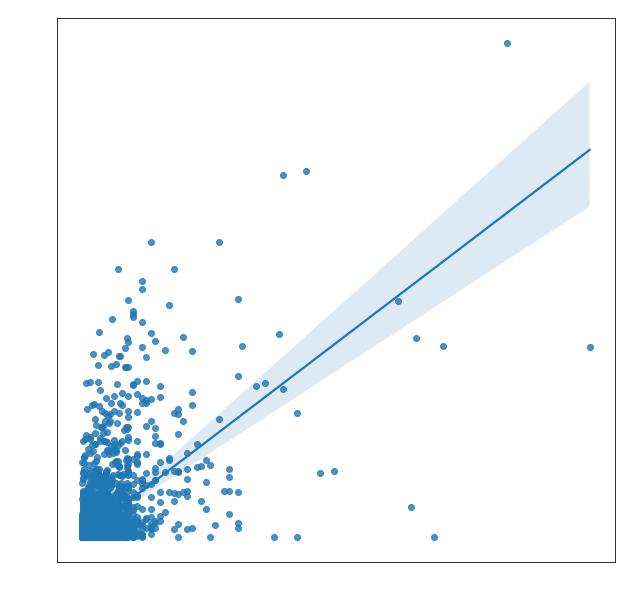

In [59]:
plt.figure(figsize=(10, 10))
sns.regplot(x="user_reviews", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('user_reviews', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [60]:
df.corr()['gross_worldwide']['user_reviews']

0.6243259050915766

## Critic Reviews (người)

In [61]:
def cr_box_plot(showFliers):
    plt.figure(figsize=(25, 14))
    sns.boxplot(df.critic_reviews,
                showfliers=showFliers)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('critic_reviews', fontsize=15)
    plt.show()



interact(cr_box_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Regplot

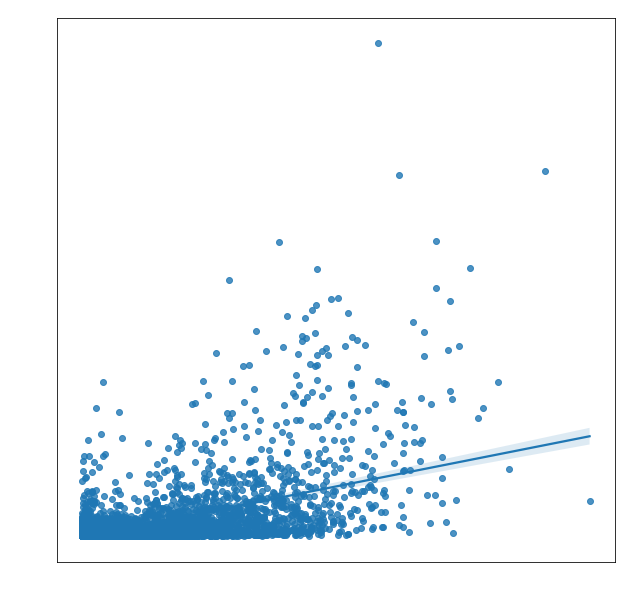

In [62]:
plt.figure(figsize=(10, 10))
sns.regplot(x="critic_reviews", y="gross_worldwide", data=df)
plt.xticks(fontsize=15) 
plt.yticks(fontsize=15)
plt.xlabel('critic_reviews', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

Hệ số tương quan

In [63]:
df.corr()['gross_worldwide']['critic_reviews']

0.5919838787693862

## Color

Số lượng

In [64]:
df.color.value_counts()

Color              19999
Black and White      174
Name: color, dtype: int64

Phân bố

In [65]:
def cl_plot(showFliers):
    plt.figure(figsize=(25, 14))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel('Count', fontsize=15)
    plt.ylabel('Color', fontsize=15) 
    sns.boxplot(y=df["gross_worldwide"], x=df["color"],
                showfliers=showFliers)
    plt.show()
    
interact(cl_plot, showFliers=[False, True])
pass

interactive(children=(Dropdown(description='showFliers', options=(False, True), value=False), Output()), _dom_…

Phim có màu có doanh thu phân bố cao hơn

## Sound mix

In [66]:
soundMix = getList('sound_mix')
print(f'Gồm {len(soundMix)}')
for stt, cast in zip(range(0, len(soundMix)), soundMix):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 40
1  DTS 70 mm
2  D-Cinema 96kHz 7.1
3  Dolby Surround 5.1
4  Auro 11.1
5  Cinesound
6  Dolby Digital
7  Dolby Stereo
8  IMAX 6-Track
9  Sensurround
10 Datasat
11 Auro 9.1
12 Dolby Surround 7.1
13 Dolby Digital EX
14 D-Cinema 96kHz Dolby Surround 7.1
15 Ultra Stereo
16 DTS-ES
17 Dolby Digital(original version)
18 Dolby
19 70 mm 6-Track
20 DTS-Stereo
21 Aurofone
22 12-Track Digital Sound
23 SDDS
24 D-Cinema 48kHz Dolby Surround 7.1
25 WANOS
26 DTS
27 6-Track Stereo
28 D-Cinema 96kHz 5.1
29 D-Cinema 48kHz 7.1
30 D-Cinema 48kHz 5.1
31 DTS:X
32 Soundelux
33 Stereo
34 HoloSound
35 Silent
36 Dolby Atmos
37 Dolby SR
38 Mono
39 AGA Sound System
40 Sonics-DDP


Dolby                                5799
Dolby Digital                        4809
Dolby Atmos                          1020
SDDS                                  705
Datasat                               641
Dolby Surround 7.1                    566
DTS                                   404
Stereo                                344
Auro 11.1                             215
D-Cinema 48kHz 5.1                    165
Dolby SR                              156
IMAX 6-Track                           88
Sonics-DDP                             65
12-Track Digital Sound                 47
Dolby Digital EX                       44
D-Cinema 96kHz 5.1                     14
6-Track Stereo                         10
DTS-ES                                 10
Dolby Stereo                            8
Mono                                    8
DTS-Stereo                              6
WANOS                                   6
D-Cinema 48kHz 7.1                      5
DTS:X                             

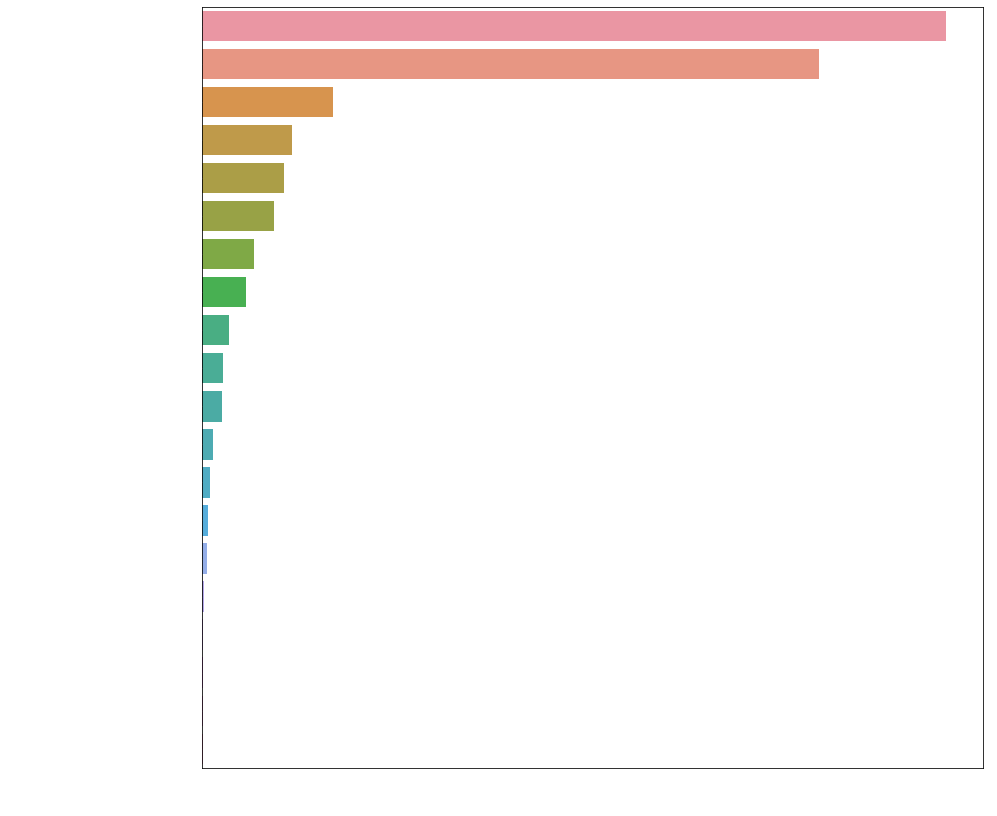

In [67]:
dataSM = []
for sm in soundMix:
    for line in df[df.sound_mix.str.contains(sm, na=False)].values:
        dataSM.append((line[0], sm, line[10], line[6], line[16]))  
dataSM = pd.DataFrame(data=dataSM, columns=['title', 'sound_mix', 'gross', 'year', 'score'])
print(dataSM.sound_mix.value_counts())
plt.figure(figsize=(14, 14)) 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
sns.countplot(y="sound_mix",data=dataSM, order=dataSM.sound_mix.value_counts().index[0:20])
plt.ylabel('Sound Mix', fontsize=15) 
plt.xlabel('Count', fontsize=15) 
plt.show()

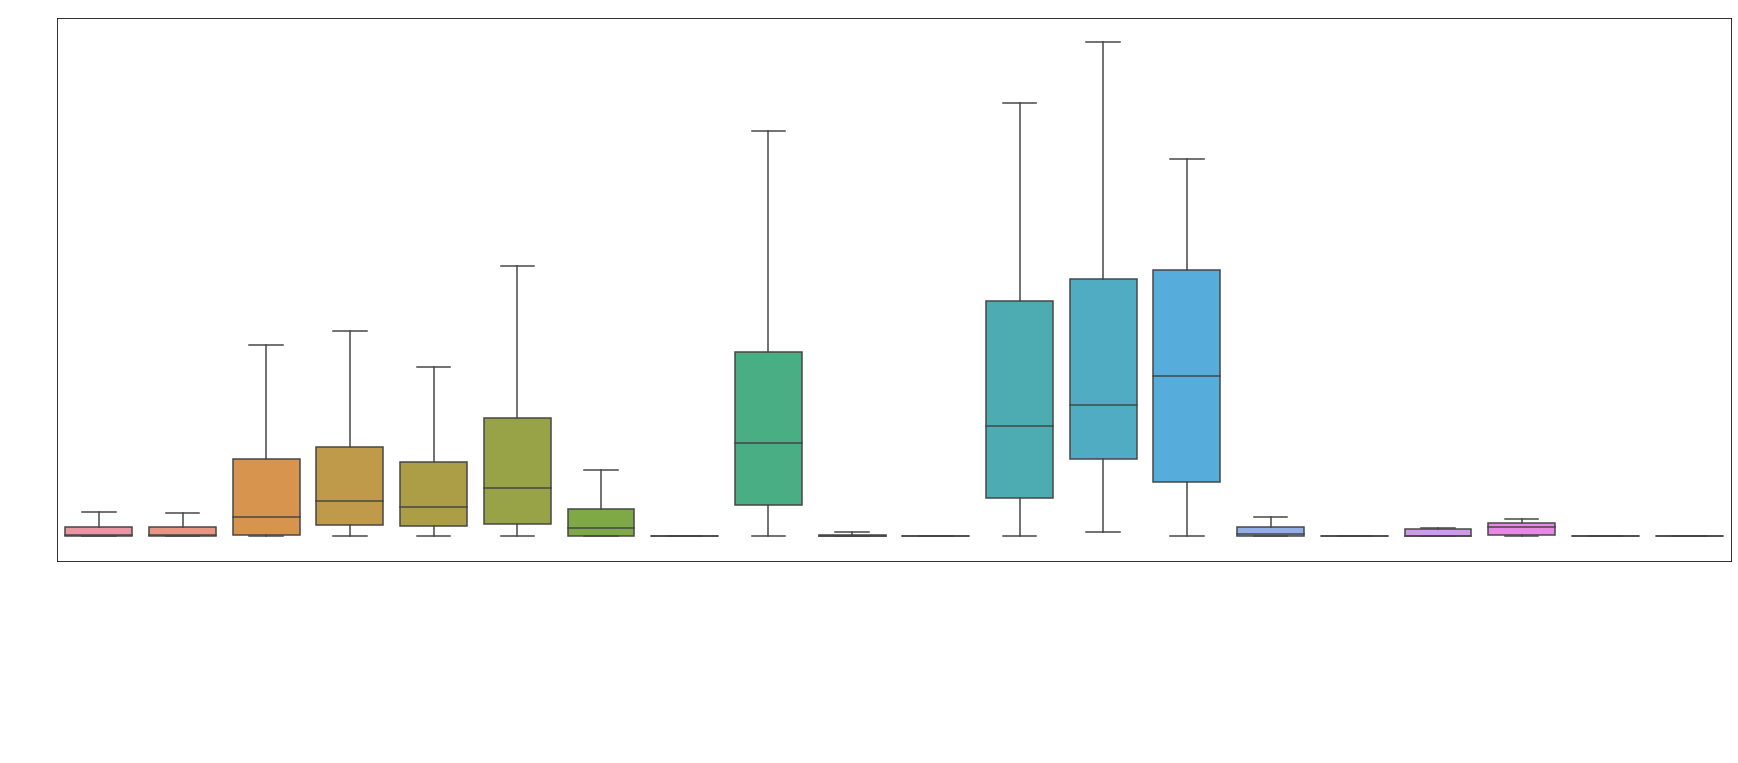

In [68]:
plt.figure(figsize=(30, 10))
sns.boxplot(y=dataSM["gross"], x=dataSM["sound_mix"],
            showfliers=False, order=dataSM.sound_mix.value_counts().index[0:20])
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Sound Mix', fontsize=15)
plt.ylabel('Gross', fontsize=15)
plt.show()

## Production_companies

In [69]:
df.production_companies.sample(1)

6871    NaN
Name: production_companies, dtype: object

In [70]:
comList = getList('production_companies') 
print(f'Gồm {len(comList)}')
for stt, cast in zip(range(0, len(comList)), comList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 16858
1  Amberdale Productions
2  OC Productions
3  Moloko Film
4  YNH Films
5  Beijing Max Times Cultural Development
6  We Productions
7  Bowsie Workshop
8  Archdiocese of Caceres
9  Beijing Liangzi Group
10 Zell-Koj Studio
11 United Films Investment Group of Beijing
12 Nippon Animation Co.
13 Filmmuse Productions
14 Noel Ashman Entertainment
15 Ark Pictures
16 Atmo Media Network
17 Marni Films
18 Accorde Filmes
19 Leyenda
20 Radiotelevisó Valenciana - RTVV
21 Industry Standard Films
22 Raincreek Productions
23 Blue Sun Pictures
24 Brothers K Productions
25 Darkest Cinema
26 WYSJ Media
27 Cassandra Films
28 Evidencia Films
29 Friday Lunch Productions
30 Wandering Bard
31 New Clues Films
32 Chickasaw Nation Productions
33 M ss ng p eces
34 Jarem Producciones
35 Underdogg Entertainment
36 Matrioska
37 North Sea Productions
38 Survival Pictures
39 Renovatio Entertainment
40 LStar Capital
41 Rolling Pictures
42 Collective Pictures
43 BarCode Entertainment
44 Goodman Bond Internationa

2832 Sonet Film AB
2833 Chi-Fou-Mi Productions
2834 Apollo Films
2835 El Costillar Films
2836 Oxymoron Films
2837 The Group Entertainment
2838 Tout sur l'Ecran
2839 Leopardo Filmes
2840 TB Produções
2841 Kopli Kinokompanii
2842 Trilogy Entertainment Group
2843 Deliberate Content
2844 Film It Suda
2845 Miramax
2846 Ajuntament de Lleida
2847 Nach-Zach Vision
2848 Kayan Productions
2849 Credofilm
2850 Huanxu Cultural Media
2851 Gimpville AS
2852 Moed Productions
2853 AskarFilm
2854 Westerly Films
2855 Pathlight Entertainment
2856 Producers at Work
2857 Coram Deo Studios
2858 Number One Productions
2859 A.B. Films
2860 Decker Bros.
2861 Creative Artisans Media
2862 MD Pictures
2863 DMK Productions
2864 Artside
2865 X Yapim
2866 Dynamite Films
2867 A I R MEDIA
2868 Reel Deal Action
2869 Acutance Pictures Corporation of China
2870 Footprint Films
2871 Double Play Films (II)
2872 Kizmar Films
2873 La Région Île-de-France
2874 Duck Attack Films
2875 Metro-Goldwyn-Mayer Studios
2876 Nakid
2877 

5832 Ishtar Films
5833 Thrills & Spills
5834 Eagle Rock Film Productions
5835 Itchy Fish Film
5836 Claqueta Cinema
5837 23-24 Audiovisual
5838 Parris Pictures
5839 Albyn Media
5840 LikeMinded Pictures
5841 Jupiter Film Group
5842 Dubai Media and Entertainment Organisation in association with Dubai Film Market (Enjaaz)
5843 Noodles Production
5844 CB Medya Group
5845 Chenming Pictures (Shanghai)
5846 Obel Film
5847 Detalle Films
5848 Indeed films
5849 RGB Productions
5850 Dreamscape Productions
5851 Cloud Atlas Productions
5852 Producciones Fílmicas Agrasánchez S.A.
5853 Sunday Night
5854 Processo Multiartes
5855 FLX
5856 Momento Naranja
5857 One In A Row Films
5858 Whenua Films
5859 ScreenWest
5860 Instituto do Cinema e do Audiovisual (ICA)
5861 Batra Showbiz
5862 Talking Wolf Productions
5863 Clever Producciones
5864 Vasoon Animation
5865 Sonet Film
5866 Anima Vitae
5867 Testukine
5868 And Nu?
5869 2020 Studio
5870 Daiichi Shokai Co.
5871 Copacabana Filmes e Produções
5872 Santa Luzia

8831 Cineville
8832 Vietnam Media Corp & Vietnam Studio
8833 Indivisual Films - Sydney
8834 Malevo Films Argentina (MFA)
8835 Shanghai Huada Film Co
8836 Brave Bunny
8837 Evci Film Production Company
8838 Escuela de Cine de Chile
8839 Cine Chromatix
8840 Take 2000
8841 EZ Films
8842 Delirium Films
8843 SellOutPictures
8844 Pohlmann Creatives
8845 Intermedia Network
8846 Badhouse Studios Mexico
8847 Kylin Network
8848 Eydelle Film
8849 JFR Productions
8850 Watermark Films
8851 Lead India Entertainments
8852 Beijing Enlight Pictures
8853 VCS Capital
8854 Local Color Films
8855 Unbroken Pictures
8856 Anno Domini Company
8857 Genesius Pictures
8858 Indie Sales
8859 Cats Films Entertainment
8860 Kamera
8861 Kiss Films
8862 Quixotic Road
8863 Mondo Studio Films
8864 La Mirada Producciones
8865 Penelope Film
8866 Essential Sports & Media
8867 Aichholzer Filmproduktion
8868 Beech Hill Films
8869 Jieum
8870 Benetone Films
8871 Saico Films
8872 Solaire Production
8873 Bazelevs Entertainment
8874

11831 Mitteldeutsche Medienförderung (MDM)
11832 Boneco Films
11833 DHE Corporation
11834 FullDawa Films
11835 Jerry Bruckheimer Films
11836 Resonant Pictures
11837 Big Face
11838 Unknown Film Maker Productions
11839 The Ink Connection
11840 Silencing Canada Productions
11841 Eagle Eye Entertainment
11842 Live Forever Productions(India)
11843 Amorós Producciones
11844 Wiedemann & Berg Filmproduktion
11845 Secret Handshake Entertainment
11846 Mini Productions
11847 Actober Films
11848 Ellipsis
11849 Gravitational Productions
11850 HI-AX
11851 Azro Media
11852 Axxon Films
11853 Film Studio "Vertical"
11854 Improductibles
11855 Amedia
11856 Goldenart Production
11857 SDB Films
11858 Double Dutch International
11859 Acheron Films
11860 Langfilm
11861 Cineworx Filmproduktion
11862 AMP Filmworks
11863 Alles ist Liebe Filmproduktions
11864 Woestijnvis
11865 Mike Young Productions
11866 Rezo Productions
11867 Core Contents Media
11868 Broad Green Pictures
11869 Eon Productions
11870 Code Enter

14830 Tiger Cinema
14831 D7 Filmes
14832 Acanthus Films
14833 Discontinuo La Película
14834 Stephen Tedeschi Production
14835 YEF Media & Entertainment
14836 Peppermint & Company
14837 Atomic Monster
14838 Citrus Films
14839 MBI International
14840 NN Films
14841 Good Universe
14842 August 1st Film Studio
14843 Kargo Film
14844 Glavkino
14845 Balance Film GmbH
14846 Geißendörfer Film- und Fernsehproduktion (GFF)
14847 Universal 1440 Entertainment
14848 Ar de Filmes
14849 PeopleForCinema Productions
14850 Hyper Films
14851 Productora 35
14852 Hitsville Films
14853 Wilfried Ackermann Filmproduktion
14854 Sisifo Films AIE
14855 Maelstrom
14856 Yagua Pirú cine
14857 Kadokawa Daiei Pictures
14858 Terra Mater Factual Studios
14859 DW Films
14860 Sommerhaus Filmproduktion
14861 Xiao Xiang Film Group
14862 BD Cine
14863 Beijing Sili Culture Media
14864 Blue Time
14865 TRI G
14866 Onsight
14867 Alquimia Films
14868 Cine Bazar
14869 Ashubia Animaton Productions
14870 Central Partnership
14871 Am

## Cast

In [71]:
df.casts.sample(1)

15319    NaN
Name: casts, dtype: object

In [72]:
castList = getList('casts')
print(f'Gồm {len(castList)} diễn viên')
for stt, cast in zip(range(0, len(castList)), castList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 32767 diễn viên
1  Marcello Novaes
2  Honor Kneafsey
3  Marcello Urgeghe
4  Adam Conover
5  Václav Jílek
6  Victor Montero
7  Evelina Blyodans
8  Farhan Al-Ali
9  Shinelle Azoroh
10 Martin Wuttke
11 Viktor Andrienko
12 Giulio Berruti
13 Murathan Muslu
14 Izabela Vidovic
15 Kieran Culkin
16 Pho Dac Biet
17 Kristin Chenoweth
18 Mihalis Mitrousis
19 Shan Qiao
20 Anthony Head
21 Trina LaFargue
22 Emily Browning
23 Larisa Baranova
24 Joan Chen
25 Art Malik
26 Mantas Jankavicius
27 Vadik Korolyov
28 Lier Quesada
29 Ingrid Caven
30 Stephen Lord
31 Caroline Craig
32 Tania Popa
33 Victor Octavio Elena
34 Winslow M. Iwaki
35 Neda Spasova
36 Anna O'Byrne
37 Tom Mercier
38 Oleg Krivenko
39 Imogen Jones
40 Bhagwant Mann
41 Dong-Hyuk Cho
42 Nico Rockwell
43 Jorge Neto
44 Alain Saadeh
45 Silvia Gerina
46 Alban Lenoir
47 Marina Ivanova
48 Tamás Szabó Kimmel
49 Terence Bridgett
50 Isabel Santos
51 Zümrüt Erkin
52 Susanne Storm
53 Waldemar Torenstra
54 Seyda Sozuer
55 Jérôme Kircher
56 Joreta Nikolo

2956 Kasper Ruwai Berg Kesje
2957 Andrew Simpson
2958 ophie Burton
2959 Philipp Hochmair
2960 Matthew Mercer
2961 Pierre Deladonchamps
2962 ig Frode Henriksen
2963 Thiago Rosseti
2964 Erik Enge
2965 Yun Luo
2966 Serif Sezer
2967 Glória Pires
2968 Ali Larter
2969 Hannah Kasulka
2970 Promise LaMarco
2971 Tim Oliver Schultz
2972 Dong-kyu Lee
2973 Claes Malmberg
2974 Nischal Basnet
2975 Sarika Singh
2976 Rita Tushingham
2977 oner Ada
2978 ofya Skya
2979 Michiyo Yasuda
2980 Mar Carrera
2981 Dustin Nguyen
2982 Felipe Román
2983 Bruno Lochet
2984 Goya Toledo
2985 Abhinav Gomatam
2986 Faizal Abdullah
2987 Albano Jerónimo
2988 Mariya Bolonkina
2989 Nonoka Yamaguchi
2990 Rachael Perrell Fosket
2991 Cüneyt Uzunlar
2992 Darren Kelfkens
2993 Nobuyuki Katsube
2994 Alma Jodorowsky
2995 Pauline Collins
2996 Géraldine Nakache
2997 Park Hae-joon
2998 Naian González Norvind
2999 Lukás Dóza
3000 Jiawen Li
3001 Miray Daner
3002 Vinay Virmani
3003 Pietro Ragusa
3004 Jenni Melear
3005 p Levendoglu
3006 Joste

5955 Ventura
5956 Lydia Peckham
5957 Ibrahim Yildiz
5958 Cheech Marin
5959 Diego Bianchi
5960 Cyron Melville
5961 Bouli Lanners
5962 Joshua Calles
5963 Somjai Sukjai
5964 Anastasiya Dobrynina
5965 Ellar Coltrane
5966 Christine Bottomley
5967 Ashley Judd
5968 Amy Chun
5969 Dixie Egerickx
5970 Adrian R'Mante
5971 Fumiyo Kohinata
5972 Elizma Theron
5973 Mandeep Dhillon
5974 Agnès Jaoui
5975 Luke Goss
5976 Kate Hudson
5977 Alfonso Tort
5978 Jagjeet Sandhu
5979 Iain De Caestecker
5980 Tatyana Drubich
5981 Geraldine Neary
5982 Evgeniya Kregzhde
5983 Dimitri 'Vegas' Thivaios
5984 Néstor Guzzini
5985 Emraan Hashmi
5986 Emma de Caunes
5987 Rense Westra
5988 Willie Esterhuizen
5989 Charlie Jarratt
5990 Jiahan Zhang
5991 Aya Hirayama
5992 Celé Du Plessis
5993 Aino Louhimies
5994 Diljit Dosanjh
5995 Cahit Berkay
5996 Yuvraj Hans
5997 Ahmed Abdelaziz
5998 Djimon Hounsou
5999 Charlie Magdaleno
6000 Macha Grenon
6001 Özge Özberk
6002 Lauren Kinsella
6003 Adejola Adeyemi
6004 Joe Koener
6005 Karim Fah

8955 Badi Abu-Shaqra
8956 Javi Alaiza
8957 Emmett J Scanlan
8958 ilvia Petkova
8959 Janelle Ginestra
8960 Fiorenza Liu
8961 Elke Winkens
8962 Gerhard Liebmann
8963 Helen Shumaker
8964 Alay Cihan
8965 Hyeon-Jeong Jo
8966 Yevgeniy Ryba
8967 Ana Moreira
8968 Gene Bervoets
8969 Nikitha Anil
8970 Evelyn Azabache
8971 Shirley Henderson
8972 Alejandra Cordero
8973 Bárbara de Regil
8974 Shirine Boutella
8975 Tiet Cuong
8976 Fran Fiol
8977 Rodrigo Poisón
8978 Caitlyn Rund
8979 Bertille Chabert
8980 Motaz Faez Basha
8981 Kathryn Newton
8982 Fujiko
8983 Amira Ghazalla
8984 Andrew MacFarlane
8985 Daniel Ruizar
8986 Ingvar Sigurdsson
8987 Javier Almeda
8988 Jiao Ren
8989 Tyler Bunch
8990 Anne Le Ny
8991 Josef Altin
8992 Patipan Lorsatian
8993 Kagiso Lediga
8994 Hannah Boudreau
8995 Boonee
8996 Andrea Acatto
8997 Bingbing Li
8998 Blake Lively
8999 Milita Brandon
9000 Ena Koshino
9001 Felix Starck
9002 Rory Uphold
9003 Eyþór Gunnlaugsson
9004 Arvo Kukumägi
9005 Warapun Nguitragool
9006 Bessy Malfa
90

11954 Egor Klinaev
11955 Raphael
11956 Molly Windsor
11957 Joon-ho Huh
11958 Tishuan Scott
11959 Helin Kandemir
11960 Mariana Xavier
11961 Miriam Freeland
11962 Sohail Khan
11963 Damla Sönmez
11964 Aïsha Ben Miled
11965 Mía Maestro
11966 Anas El Baz
11967 ine Fischer Christensen
11968 Margherita Buy
11969 Jacques Boudet
11970 Piper Curda
11971 Deniz Hasgüler
11972 Leandro Cóccaro
11973 Ki-joo Jin
11974 Bülent Arin
11975 John Brumpton
11976 Tara Strong
11977 Marisol Ribeiro
11978 Ziad Bakri
11979 Riddhi Sen
11980 Jeremy Suarez
11981 Bhadram
11982 Berk Balci
11983 Jacob Anderton
11984 Miah Madden
11985 Petra Beck
11986 Kreepolrerk Darvid
11987 Daniel Lloyd
11988 Carrie-Anne Moss
11989 Martin Caparros
11990 Stana Katic
11991 Valery Altamar
11992 Liang Zhang
11993 Clara Ponsot
11994 Penélope Cruz
11995 Jaime Camil
11996 Irrfan Khan
11997 Ramesh
11998 Do-yoon Jang
11999 Markus Schleinzer
12000 Maria Sid
12001 Lisa Thoreson
12002 Jinxi Haiha
12003 Chris Perfetti
12004 Hongxiang Cai
12005 Fra

14954 Luiza-Gabriela Brovina
14955 Somboonsuk Niyomsiri
14956 Xiaotong Guan
14957 Déborah Lukumuena
14958 Oliwia Ogorzelska
14959 Taha Tegin Özdemir
14960 Ömür Cedimagar
14961 Alba Ferrara
14962 Ágnes Máhr
14963 Francesco Pannofino
14964 João Camargo
14965 Shiladitya Sen
14966 Masachika Ichimura
14967 Gustavo Machado
14968 Ahmed Mekky
14969 Miranda Frigon
14970 Suxi Ren
14971 Cesar De Sutter
14972 Zeyu Chen
14973 Neet Chowdhary
14974 Boris Abramov
14975 Anna Margaret Hollyman
14976 Faysal Abbaoui
14977 Sarah Alimardani
14978 Joe Gallagher
14979 Lola Errando
14980 Xu Dai
14981 Bo-ra Nam
14982 Luis Manzano
14983 Guy Pearce
14984 Jinglin Guo
14985 Vladimir Steklov
14986 Jeffrey Tambor
14987 Michael Garvey
14988 Clif Prowse
14989 Aamu Milonoff
14990 Martin Palmer
14991 Lies Visschedijk
14992 Norma Ruiz
14993 idse Babett Knudsen
14994 Milos Zeman
14995 Alejo García Pintos
14996 Mouli
14997 Vincy Aloshious
14998 Inês Castel-Branco
14999 Dorothea Myer-Bennett
15000 Padung Songsang
15001 Elish

18050 Daria Vitkova
18051 Celal Bikay
18052 Gode Benedix
18053 Mahamadou Yaffa
18054 James Caan
18055 Elyssa Erhardt
18056 Amy Madigan
18057 João Pedro Mamede
18058 Przemyslaw Bogdanowicz
18059 Mikhail Fedorchenko
18060 Umer Alam
18061 Ekin Koç
18062 Germandt Geldenhuys
18063 Peter Franzén
18064 Arghavan Shekari
18065 Mike O'Malley
18066 Alex Czerwinski
18067 Lawrence Michael Levine
18068 Ahmet Rifat Sungar
18069 Oabnithi Wiwattanawarang
18070 Mágica Pérez
18071 Manami Enosawa
18072 Norbert Leo Butz
18073 Yueming Pan
18074 Cansu Karatas
18075 Frida Gustavsson
18076 Rudolf Waldemar Brem
18077 Tamara Yatsenko
18078 Michael Berryman
18079 Bo Dong
18080 Briana Evigan
18081 Anastasiya Korotkaya
18082 Olga Peretyatko
18083 Gábor Jászberényi
18084 Rusty Shackleford
18085 Kedryn Carpenter
18086 Luciana Acuña
18087 ofía Urosevich
18088 Daniil Filenko
18089 Olly Alexander
18090 Elif Baysal
18091 Aleksander Holmen
18092 Jakob Eklund
18093 Caroline Flack
18094 Yûma Ishigaki
18095 Özlem Yilmaz
1809

21146 Alex Jennings
21147 Els Deceukelier
21148 Juva Si Ahmed
21149 Joan Dausà
21150 Andrés Castañeda
21151 Yuichi Haba
21152 Emma Friedman-Cohen
21153 Adam Croasdell
21154 Aleksandr Gordon
21155 Christian Strasser
21156 Harry Treadaway
21157 Tato Gabus Mendes
21158 Cheryl Ladd
21159 Tommaso Lazotti
21160 Ísey Heiðarsóttir
21161 Sangeeta Krishnasamy
21162 Gina Gershon
21163 Rosa Meinecke
21164 Hiroko Yakushimaru
21165 Chris Faux
21166 Nouel Riel
21167 Saad Zia Abbasi
21168 Vedat Delibas
21169 Krissana Sreadthatamrong
21170 Gina Carano
21171 Elvira Mínguez
21172 Simon J. Berger
21173 Holly Goss
21174 Kari-Pekka Toivonen
21175 Eva Bianco
21176 Aleksandar Bercek
21177 Adriana Botina
21178 Keerthy Suresh
21179 Radu Iacoban
21180 Sertaç Ekici
21181 Leah Dou
21182 Sofia Happonen
21183 Maximilian Belle
21184 Nancy Brunning
21185 Isla Fisher
21186 Gabi Amrani
21187 Shawn Adrian Khulafa
21188 Loes Luca
21189 Yoo Su-bin
21190 Edward Hall
21191 Martha Higareda
21192 John Major Davis
21193 Elzbiet

24452 Yoshitsugu Matsuoka
24453 Thor Braun
24454 Estefania Blaiotta
24455 Eric Tsang
24456 Joey Rasdien
24457 Koen Dobbelaer
24458 Barbara Tabita
24459 Sven Ruygrok
24460 Cheng-Ping Chao
24461 Marie-Lou Sellem
24462 Shanyn Leigh
24463 Willa Holland
24464 Shamoon Abbasi
24465 Sonoya Mizuno
24466 John Emmet Tracy
24467 Özay Fecht
24468 Jean Bush Howard
24469 Luis Enrique de Tomás
24470 Bendrit Bajra
24471 Bee Namthip
24472 Nikki Hsieh
24473 Marian Mitas
24474 Sebastian Pigott
24475 Thomas Hildebrand
24476 Asuka Nishi
24477 Margarida Sousa
24478 Mithun Ramesh
24479 Lianshun Kong
24480 Michele Botrugno
24481 Charles S. Dutton
24482 Tian Jing
24483 Ebru Eker
24484 Lila Salet
24485 Anastasiya Imamova
24486 Gage Golightly
24487 Momo Asakura
24488 Noriko Eguchi
24489 Aneurin Barnard
24490 Devanny Pinn
24491 Martín Benedettelli
24492 Dora Freind
24493 Nilay Duru
24494 Magdalena Berus
24495 Dana Goldberg
24496 Leif Nygaard
24497 Shaoshi Qu
24498 María Fernanda Ferro
24499 Satna Titus
24500 Samer

27452 Kathleen Wilhoite
27453 Ilyas Salman
27454 Suki Waterhouse
27455 Banu Cicek
27456 Natalya Medvedeva
27457 Jonas Chernick
27458 Allie MacDonald
27459 Simon McBurney
27460 Britani Bateman Underwood
27461 Cédric Appietto
27462 Tygo Bussemakers
27463 Stefaniya Koleva
27464 Levent Akkök
27465 Min-soo Jo
27466 Max Bloom
27467 Zhaleh Sameti
27468 Alexander Asochakov
27469 Carla Cassola
27470 Baron Bodnar
27471 Carlos 'El Mono' Sanchez
27472 Arin Kusaksizoglu
27473 Morgan Peter Brown
27474 Azumi Asakura
27475 Elit Iscan
27476 Raymond Thiry
27477 Jacob Gregory
27478 Sanchita Shetty
27479 vetlana Antonova
27480 Sharunas Bartas
27481 Patrizio Rispo
27482 Kym Marsh
27483 Snorri Engilbertsson
27484 Miriam Stein
27485 Miriam Cooke
27486 Manjari Fadnnis
27487 Constantin von Jascheroff
27488 Bogdan Benyuk
27489 Yûichi Nakamura
27490 Seiji Rokkaku
27491 Kevin Heffernan
27492 Arshad Warsi
27493 Paul Hipp
27494 Marek Taclík
27495 Zafer Diper
27496 Sean Gilder
27497 Dorottya Udvaros
27498 Alyona Mik

30451 Diana Marquês Guerra
30452 Karena Kar-Yan Lam
30453 Carole Bouquet
30454 Marta Carmona
30455 Erica Dasher
30456 Jade Asha
30457 David Lawrence Brown
30458 Bence Szalay
30459 Zhengjian Guo
30460 David DeSanctis
30461 Jovana Gavrilovic
30462 Qing'an Ren
30463 Jade Hobday
30464 Zoya Hussain
30465 Valeria Bilello
30466 Kim Yoon-seok
30467 Byeol Kang
30468 Adam Plekanec
30469 An Jo
30470 Ingrid Olerinskaya
30471 Zhao Rui
30472 Octavio Pisano
30473 Athalia Routier
30474 Tom Vermeir
30475 Adrija Cepaite-Palsauskiene
30476 Linsy Holguín
30477 Chris Niosi
30478 Yoo Seung-ho
30479 Katarina Jacobson
30480 Robi Domingo
30481 Fabio Bressan
30482 Rohit Saraf
30483 Jonathon McClendon
30484 Roni Jonah
30485 Ali Barkin
30486 Lalita Panyopas
30487 Arnau Comas
30488 Felipe Arocena
30489 Mireia Oriol
30490 Emilio Gavira
30491 Orhan Kilic
30492 Eric Jacobus
30493 Lam Vinh Hai
30494 Tatjana Saphira
30495 Mary Mouser
30496 Hannah Dybvand
30497 Chloe Csengery
30498 Ogie Alcasid
30499 Ashley Zukerman
305

## Director

In [73]:
df.directors.sample(1)

531    Brendan Fletcher,
Name: directors, dtype: object

In [74]:
dicList = getList('directors')
print(f'Gồm {len(dicList)} Đạo diễn')
for stt, cast in zip(range(0, len(dicList)), dicList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 14314 Đạo diễn
1  Vidhi Kasliwal
2  Rasmus A. Sivertsen
3  Anna Matison
4  Michael Schwartz
5  Stephen Herek
6  Wladyslaw Pasikowski
7  Kent Moran
8  Alê Abreu
9  Nathan Morlando
10 Dean Israelite
11 Chris Patterson
12 Tatsuya Nagamine
13 Nicolas Charlet
14 Hisashi Saitô
15 Viet Max
16 Rajpal Yadav
17 Mher Mkrtchyan
18 James Watkins
19 Tim Rouhana
20 Matthias Schweighöfer
21 Sijie Dai
22 Jean-Paul Rappeneau
23 Dean DeBlois
24 Elisabeth Subrin
25 Han Han
26 Jianqi Huo
27 Rapeepimol Chaiyasena
28 Guido Lombardi
29 Michael Spierig
30 Milena Cocozza
31 Sermiyan Midyat
32 Christine Hartmann
33 Gian Alfonso Pacinotti
34 Emine Emel Balci
35 Rain Tolk
36 Jeanette Nordahl
37 Oriol Ferrer
38 Joe Chien
39 Stacy Title
40 Hamdi Alkan
41 Ruxandra Ghitescu
42 Nicolae Margineanu
43 Jacques Martineau
44 Ifeanyi Ikpoenyi
45 Yongfeng Shang
46 Salvatore Allocca
47 Sang-Hyun Park
48 Andrés Couturier
49 Savi Gabizon
50 Marc Collin
51 Arthur Nunes
52 Roberto Andò
53 Aleksandr Proshkin
54 Jacek Bromski
55

3168 Pascal Laugier
3169 Cristian Jure
3170 Leon Marr
3171 Albert Hughes
3172 Denis Villeneuve
3173 Dominga Sotomayor
3174 Ishi Rudell
3175 Ian Gabriel
3176 Keming Hou
3177 Juan Cruz
3178 Tomas Donela
3179 Andrew Ahn
3180 Jimena Blanco
3181 Carlos Jaureguialzo
3182 Bharat Nalluri
3183 Luciana Foglio
3184 Patricia Font
3185 Nicanor Loreti
3186 Kazuchika Kise
3187 José Eduardo Belmonte
3188 Gavin Wiesen
3189 Lina Rodriguez
3190 Pisut Praesangeam
3191 James Cox
3192 Carlos Sedes
3193 Wang Chuan
3194 Cem Sürücü
3195 Alexander Kluge
3196 Nick Dalmacy
3197 Dan Beers
3198 Jaime Osorio Marquez
3199 Mia Hansen-Løve
3200 David Mahmoudieh
3201 Hugo Gélin
3202 G. Prajith
3203 Oscar Liza Alauie
3204 Gary Lundgren
3205 Goran Markovic
3206 Yonay Boix
3207 Boris Boo
3208 Doo-Hwan Lee
3209 Isara Nadee
3210 Stewart Raffill
3211 Ron Yuan
3212 Fatih Mehmet Karakus
3213 Gustavo Ron
3214 Abhishek Kapoor
3215 Eddie Mensore
3216 Ioana Uricaru
3217 Deeraj Vaidy
3218 Alexandre Powelz
3219 Mathieu Demy
3220 Tai-

6167 Jeremy Dyson
6168 Hanung Bramantyo
6169 Yûichirô Hirakawa
6170 Frances Lea
6171 Mario Ribero Ferreira
6172 Vishal Mishra
6173 Nigel McCulloch
6174 Ahmet Küçükkayali
6175 Thomas Cailley
6176 Jaakko Manninen
6177 Frank Krom
6178 Gopi Nainar
6179 Kaige Chen
6180 Joon-Young Bong
6181 Nathan Silver
6182 Tate Taylor
6183 Mehmet Ada Öztekin
6184 Stephen Amis
6185 James Vanderbilt
6186 Ki-hwan Oh
6187 Ivan Botha
6188 Marcela Balza
6189 Richard Grieco
6190 Just Philippot
6191 Pakphum Wongjinda
6192 Andrey Bogatyrev
6193 Jorge Luquín
6194 Alexander Hahn
6195 Nick Wells
6196 Wagner de Assis
6197 Miroslav Stamatov
6198 Pablo Agüero
6199 Christophe Blanc
6200 Marco Petry
6201 Timothy Woodward Jr.
6202 Lijun Sun
6203 Thiru
6204 Shady Al Ramly
6205 Ricardo Curtis
6206 Tom Shadyac
6207 Ram Madhvani
6208 Onur Ogden
6209 Harold Holscher
6210 Kazuya Shiraishi
6211 Suzuya Bobo
6212 David Moreau
6213 Sorathep Vetwongsatip
6214 K. Biju
6215 Mario Tronco
6216 Shilei Lu
6217 Meng Tian
6218 Aleksandr Nezl

9166 Jon Sanders
9167 Nick Cassavetes
9168 Samu Fuentes
9169 Quentin Dupieux
9170 Lynne Ramsay
9171 Justin Tipping
9172 Rudresh M. Gowda
9173 Remy van Heugten
9174 Metin Koc
9175 Jakrawal Nilthamrong
9176 Robbie Bryan
9177 Chiara Bellosi
9178 Naoko Yamada
9179 Francis Lawrence
9180 Pedro Santo
9181 Brian Perkins
9182 Max Joseph
9183 Tom Green
9184 Gökhan Erkut
9185 David Sainz
9186 Kamil Koc
9187 Zheng Xu
9188 Amro Hamzawi
9189 Erick Cortés Alvarez
9190 Shashanka Ghosh
9191 Mats Lindberg
9192 Michael Almereyda
9193 Paolo Conti
9194 Pierre Dudan
9195 Tim Allen
9196 Wayne Blair
9197 Andrey Khrzhanovskiy
9198 Un Cho
9199 Adam Bin Amiruddin
9200 Ethan Zvi Kaplan
9201 Adriano Esturilho
9202 Jorge Michel Grau
9203 Benicio Del Toro
9204 Johan Timmers
9205 Tony Jopia
9206 Chao Yang
9207 Oliver Kolker
9208 Kenji Shibayama
9209 Tom Tykwer
9210 Sharath Haridaasan
9211 Maja Milos
9212 Alexandr Romanets
9213 Truong Chi Binh
9214 Emir Kusturica
9215 Rémi St-Michel
9216 Kim-Ching Luk
9217 Luc Vincigu

9666 Brian K. Roberts
9667 Eugenio Zanetti
9668 Mark Dacascos
9669 Svyatoslav Ushakov
9670 M. Fahad Khan
9671 Ramesh Pisharody
9672 Jézabel Marques
9673 Charles Martin Smith
9674 Ari Sandel
9675 Prashanth Neel
9676 Carl Medland
9677 Paul Downs Colaizzo
9678 Svyatoslav Podgaevskiy
9679 Gülbin Aydin
9680 Jeremy Gardner
9681 Thomas Szabo
9682 Hannah Fidell
9683 Phan Quang Binh Nguyen
9684 Paul Lefevre
9685 Ljubo Zdjelarevic
9686 Kim Ha-ra
9687 Tina Gharavi
9688 Declan Recks
9689 Kavi Raz
9690 Bernardo Francese
9691 Terence Nance
9692 Taoge Li
9693 Samuel Jouy
9694 Roland Emmerich
9695 Andy Newbery
9696 Jay Abello
9697 Pauli Janik
9698 Su-won Shin
9699 Matías Moltrasio
9700 Charlie Stratton
9701 Christopher Jenkins
9702 Walter Doehner
9703 Edward Zwick
9704 Bruce Thierry Cheung
9705 Matt Brown
9706 Dusan Rapos
9707 Francisco Lupini
9708 Johan Brisinger
9709 Le-Van Kiet
9710 Maren Ade
9711 Nóra Lakos
9712 Maria Blumencron
9713 Viktor Alfyorov
9714 Igor Maltagliati
9715 Helena Bergström
9716

12165 Pandiraj
12166 Junji Sakamoto
12167 Patricio Valladares
12168 Bahman Ghobadi
12169 Anika Decker
12170 Basil da Cunha
12171 Aytaç Agirlar
12172 Asaf Korman
12173 Miguel Babo
12174 Christopher Menaul
12175 Masatoshi Kurakata
12176 Michael Arias
12177 Menhaj Huda
12178 Tomas Alzamora
12179 Özlem Akovaligil
12180 Laurence Ferreira Barbosa
12181 Demián Rugna
12182 Evgeniya Yatskina
12183 Juan Manuel Cotelo
12184 Magnús Jónsson
12185 Marta Santovjáková Gerlíková
12186 Hyung Hyup Kim
12187 Carol Morley
12188 Pedro Amorim
12189 Jean Becker
12190 Caleb Doyle
12191 Fernando Kalife
12192 Paul Wright
12193 Lisa Addario
12194 Sergey Loban
12195 Marco Risi
12196 Prosit Roy
12197 Egor Abramenko
12198 Neville Raschid
12199 Inon Shampanier
12200 Matías Szulanski
12201 Sergi Lara
12202 Srikanth Addala
12203 Tobias Wiemann
12204 Ganesh Raj
12205 Charles Martin
12206 Jakob Ziemnicki
12207 Niall Johnson
12208 Daniela Castro
12209 Timo Vuorensola
12210 More Raca
12211 Lamine Diakite
12212 Bethany Asht

12665 Takahisa Zeze
12666 Kasra Farahani
12667 Frédéric Fonteyne
12668 Vatche Boulghourjian
12669 Yasuto Nishikata
12670 Tony Wash
12671 Donald Rice
12672 Valérie Massadian
12673 Élise Girard
12674 Eugeniusz Korin
12675 Mohammed Hammad
12676 Tony West
12677 René Sampaio
12678 Milan Karadzic
12679 Seenu Ramasamy
12680 Gangliang Fang
12681 Oliver Daly
12682 Oliver Lee Garland
12683 Zhiwei Deng
12684 Mtjj
12685 Václav Marhoul
12686 Mitchell Klebanoff
12687 Ivano De Matteo
12688 Karin Fahlén
12689 Onur Aldogan
12690 Vyacheslav Alyoshechkin
12691 Özkan Çelik
12692 Nikolay Mutafchiev
12693 Michael Showalter
12694 Meritxell Colell
12695 Fede Alvarez
12696 Janet Chun
12697 Max Currie
12698 Changzheng Zhang
12699 Felipe Guerrero
12700 Salomón Shang
12701 John Curran
12702 Michael Mohan
12703 Nicolas Bonilauri
12704 Massimo Coglitore
12705 Ismaël Saidi
12706 Burak Arliel
12707 Monte Hellman
12708 Will Wernick
12709 Jota Linares
12710 Gülistan Acet
12711 Soon-rye Yim
12712 Nitin Kakkar
12713 Vlad

In [75]:
wriList = getList('writers')
print(f'Gồm {len(wriList)} Biên kịch')
for stt, cast in zip(range(0, len(wriList)), wriList):
    if stt+1 < 10:
        print(f"{stt+1}  {cast}")
    else:
        print(f"{stt+1} {cast}")

Gồm 24349 Biên kịch
1  Vidhi Kasliwal
2  Rashad Safar
3  Alê Abreu
4  Bill S. Ballinger
5  Viet Max
6  Sijie Dai
7  Mr. Moris
8  Eric Altmayer
9  Brian Hohlfeld
10 Jianqi Huo
11 Rachel Cusk
12 Emine Emel Balci
13 Dandan Li
14 Catherine Paillé
15 Atsushi Maekawa
16 Patrizia Pistagnesi
17 Marianna Garofalo
18 Jonathan Roberts
19 Sang-Hyun Park
20 Gurpreet Singh Palheri
21 Andrew Chiang Meng Ngin
22 Lu Cafaggi
23 Sean Banan
24 David Planell
25 Sisi Huang
26 Jacek Bromski
27 Michinao Okada
28 Jan Tománek
29 Diana Ossana
30 Tommy Krappweis
31 Sam Esmail
32 Michelle Keserwany
33 Stephen Dunn
34 Caner Alper
35 Konstantin Charmadov
36 Il-Hyeong Lee
37 George Kanatt
38 André van Duren
39 Lee Sales
40 Takashi Koizumi
41 Steven Baigelman
42 Alain Saadeh
43 Mark Pickering
44 Rustam Ilyasov
45 Francesco Ghiaccio
46 Yasmine Akram
47 Johan Kling
48 Pablo Giorgelli
49 Marco Martins
50 Luke Harvis
51 Paula Ortiz
52 Margarethe von Trotta
53 Jill Sprecher
54 Ahishor Solomon
55 Abel Arcos Soto
56 Dominiqu

843 Fabio Massa
844 Louis Sutherland
845 Suhas
846 Robert Damon Schneck
847 Henrik Ruben Genz
848 Jeevan Baby Mathew
849 Lucilla Schiaffino
850 Milly Cohen
851 Dervis Zaim
852 Paul Fisher
853 Johnny Remo
854 Sumit Arora
855 Caner Özyurtlu
856 Pascal Arnold
857 Daud Sumolang
858 Otto Guerra
859 Alper Mestçi
860 Gavriil Tzafkas
861 Yusuf ali Khan
862 Pete Meadows
863 Lumír Holcák
864 Jirí Kos
865 Meghvrat Singh Gurjar
866 Garret Shanley
867 Prawaal Raman
868 Joey Hartstone
869 Quinton Peeples
870 Bryan Fogel
871 Vladimir Kunin
872 Mahamat-Saleh Haroun
873 Vishwas Paandya
874 Dito Montiel
875 Fikret Reyhan
876 Aash Karan Atal
877 Gen Urobuchi
878 David Perea
879 Varol Yasaroglu
880 Rainer Frimmel
881 Ángel Amorós
882 Kate Angelo
883 Carlos Kotkin
884 Venkat Ramji
885 Keith Sharon
886 Luke Sparke
887 Reginaldo Faria
888 Nicolás Grosso
889 Chris Buck
890 Adam August
891 Sidney King
892 Vaibhav Suman
893 ang Ang
894 Doriana Leondeff
895 Jan Holoubek
896 Christina Hodson
897 Job Gosschalk
898

3342 Valentina Ferlan
3343 Naryono Prayitno
3344 Richard Raymond Harry Herbeck
3345 Chun Lei Chen
3346 Paul Da Silva
3347 Kwang-kyo Jin
3348 Adán Aliaga
3349 Philippe Piazzo
3350 Reiko Yoshida
3351 Primo Brown
3352 Mauro Uzzeo
3353 Elke Weber-Moore
3354 Lea Carpenter
3355 Zhang Xiaodan
3356 Paul Willetts
3357 Jin-moo Kim
3358 Javier Velasquez
3359 Audemir Leuzinger
3360 Barbara Halary-Lafond
3361 Nischay Kutt
3362 Mohamed Sadeq
3363 Zhizhong Cai
3364 Leonid Korin
3365 Khaled Spiewak
3366 Martin Jern
3367 Wellesley Wild
3368 Vojtech Masek
3369 Laron Austin
3370 Ted Amaradidis
3371 Lan Bai Se
3372 Guillaume Canet
3373 Jeremy Lovering
3374 Wayne Crawford
3375 Kent Nerburn
3376 Cory Gustke
3377 Julia Fair
3378 Ji-young Gong
3379 Miguel Ángel Blanca
3380 Nicola Yoon
3381 Skip Woods
3382 Francisco Zegers
3383 Herman Koch
3384 Elizabeth Hunter
3385 Andrey Konchalovskiy
3386 Alexandre Coffre
3387 Antonín Procházka
3388 Aaron Brookner
3389 Mika Ohmori
3390 Michael Lloyd Green
3391 Bhaswati Chak

3842 Maurizio Nichetti
3843 Petra Revenue
3844 Gatis Smits
3845 Esther Feldman
3846 Xu Lei
3847 Dilip Shankar
3848 Johnny Harrington
3849 Kamini Zantoko
3850 Tanya Hamilton
3851 Carlos González López
3852 Lucio Besana
3853 Shûhei Fujisawa
3854 Silvina Schnicer
3855 Françoise Charpiat
3856 Pablo Hernando
3857 Wei Zhang
3858 Jussi Adler-Olsen
3859 Ilya Sherstobitov
3860 Paul Munger
3861 Tae-kyeong Kim
3862 James Hung
3863 Hideki Sonoda
3864 Per-Olav Sørensen
3865 Pathik Vats
3866 Nayan Padrai
3867 Damien Chazelle
3868 Emmanuelle Bercot
3869 Keith Thompson
3870 Iben Gylling
3871 Ping Shu
3872 Josan Hatero
3873 Suat Ay
3874 Georgiy Daneliya
3875 Douglas Schwartz
3876 Gemma Lienas
3877 Mark Brown
3878 Iku Aso
3879 Ulf Malmros
3880 He Wen
3881 Mauro Borrelli
3882 Melanie Simka
3883 Nicolás Puenzo
3884 Dean Devlin
3885 Julie Bonnie
3886 Christopher Cain
3887 Luz Dary Mina
3888 Bogdan Adrian Toma
3889 Curtis Holt Hawkins
3890 Ali Tanriverdi
3891 Viktor Dobrosotskiy
3892 Jimmy Laporal-Trésor
38

6600 Yuri Grymov
6601 Kario Salem
6602 Anca Buja
6603 Engin Günaydin
6604 Rune Schjøtt
6605 Mary King
6606 Jonathan Barré
6607 Caterina Carone
6608 Michael Berry
6609 Sugisaku
6610 Karina Zarfino
6611 Yusry Abd Halim
6612 Ana Maria Moretzsohn
6613 Ekaterina Mavromatis
6614 Heitor Dhalia
6615 Mark Gill
6616 Burk Sharpless
6617 S. Manasvi
6618 Sang-Won Ha
6619 Andrew Wong
6620 Mike Birbiglia
6621 Julie Taymor
6622 Jim Jarmusch
6623 Jung-hwan Kim
6624 Troy Kennedy-Martin
6625 Herminio Ciscomani
6626 Charles Exbrayat
6627 Harry Elfont
6628 Sun-ae Lim
6629 Jacques Vriens
6630 Boris Guts
6631 Federico García Lorca
6632 Émile Gaudreault
6633 Rezo Gigineishvili
6634 Shotaro Ishinomori
6635 Marjan Alcevski
6636 Erico Beduschi
6637 Rob Williams
6638 Bojan Vuletic
6639 Friðrik Þór Friðriksson
6640 Bernard Sachsé
6641 Frankie Tam
6642 Ning Zhong
6643 Reg Cribb
6644 Kostia Testut
6645 Michael Ferris
6646 Kôsuke Mukai
6647 Celia King-Lee Yu
6648 Hwan Lee
6649 Asa Nonami
6650 Pankaj Matta
6651 Mike H

9642 Denisse Arancibia Flores
9643 Bene Dion Rajagukguk
9644 Nathan Ciarleglio
9645 Joanna Smith Rakoff
9646 Enrique Vázquez
9647 Matthew Sand
9648 Kyung-Mo Yang
9649 Bret Easton Ellis
9650 Joaquín Cociña
9651 Laura Beaumont
9652 Jean Dubois Morfin
9653 Kristupas Sabolius
9654 Shadi Alfons
9655 Marta Manzotti
9656 Savas Korkmaz
9657 Swanand Kirkire
9658 Lisa Cholodenko
9659 Thrissur Gopalji
9660 Hussein Alansari
9661 Marta Gomes
9662 Alessandra Di Pietro
9663 Penelope Skinner
9664 Doug Buchanan
9665 Rita Azevedo Gomes
9666 Glenn Montgomery
9667 Nur Naquyah bt Burhanuddin
9668 Aleksey Timm
9669 Adina Pintilie
9670 Tim Tyson
9671 Ian Olds
9672 Danie Barnard
9673 Paolo Cevoli
9674 Aparna Sen
9675 Mikael Wahlforss
9676 François Pirot
9677 Smeep Kang
9678 Aleksey Rymov
9679 Hans Christian Andersen
9680 Jaron Albertin
9681 Kankurô Kudô
9682 Miguel de Cervantes y Saavedra
9683 Zachary Donohue
9684 Utsana Phleungtham
9685 Josep Maria Miró
9686 Lorenzo Favella
9687 Stuart Ortiz
9688 Carol Cheon

12600 Petr Hudský
12601 Sadie Brown
12602 Paweenut Pangnakorn
12603 Alicia Luna
12604 Jingming Guo
12605 Nils Bökamp
12606 Nesrin Samdereli
12607 Philipp Yuryev
12608 Alex Epstein
12609 Hjh. Ainon Ariff
12610 Coco Castillo
12611 Raoul B. Reinert
12612 I. Ahmed
12613 Sharat Katariya
12614 Rogier de Blok
12615 Vasiliy Sigarev
12616 Samuel Frauenstein
12617 Hideyuki Katsuki
12618 Doug Ellin
12619 Chris McKenna
12620 Kris Avedisian
12621 Pavel Usachev
12622 Rosemberg Cariry
12623 Adolf Zika
12624 Zoe Kazan
12625 Yiddá Eslava
12626 Brian Gunn
12627 Dave Franco
12628 Mitchell Kapner
12629 Rajath
12630 Tsukine Sakuno
12631 Daniel Torres
12632 Srdjan Koljevic
12633 Hidehiro Ito
12634 Maj Rørbæk Damgaard
12635 Nikolay Suslov
12636 Justas Mamontovas
12637 Venkat D. Pati
12638 P.S. Rafeeque
12639 Juliette Towhidi
12640 Árni Ólafur Ásgeirsson
12641 Gilles de Maistre
12642 Ben Livingston
12643 Vetrimaaran
12644 Agota Kristof
12645 Daga Edholm
12646 Dorte Warnøe Høgh
12647 Marcus Sakey
12648 Mahendr

13025 Fong Wei Lim
13026 Yue Ma
13027 Hunter S. Thompson
13028 Michèle Laroque
13029 Ariya Pornsriwiwat
13030 Nag Ashwin
13031 Chad Faust
13032 Masahide Ichii
13033 Valerio Manfredi
13034 Lucia Lipschutz
13035 Geoff Thompson
13036 James Goldman
13037 Siavani
13038 Eduardo Tartaglia
13039 Lake Bell
13040 Gibrán Portela
13041 Amit Khan
13042 Ami Canaan Mann
13043 Djamel Bensalah
13044 Liliana Paolinelli
13045 Serhat Caradee
13046 Jonathan Ames
13047 Giuliano Miniati
13048 Xiaojun Yue
13049 John Martoccia
13050 Miguel Herrero Herrero
13051 Andrzej Zulawski
13052 Jang-Hoon Lee
13053 Barbara Wong Chun-Chun
13054 Jeff Schechter
13055 Mehmet Aslantug
13056 Tomoka Shibasaki
13057 Özge Efendioglu
13058 Anne Valton
13059 Nicolas Saada
13060 Shubhendu Bhattacharya
13061 Jon Kaplan
13062 Robin Mukherjee
13063 Job Römer
13064 Prabesh Poudel
13065 Noah Hutton
13066 Milan Cieslar
13067 Young-Joon Ha
13068 Aleksi Puranen
13069 Gowri Goli
13070 Keir O'Donnell
13071 Michael Murphy
13072 Cinzia Panzettin

15338 Raga Oktay
15339 Nicholas McCarthy
15340 Bill Collage
15341 Carlos Ignacio Trioni Bellone
15342 Matt Murphy
15343 Marco Bocci
15344 José Carlos Somoza
15345 Hubert Lesniak
15346 Matthew Saville
15347 Gianluca Curti
15348 Sinyi Chen
15349 Roberto Bubas
15350 Jean-Pierre Hasson
15351 Darryl Yap
15352 Tom Sizemore
15353 Anders Jacobsson
15354 Maddalena Ravagli
15355 Ryan Lieske
15356 Jacob Chase
15357 Petri Kotwica
15358 Jacob Vaughan
15359 Omer Getcu
15360 Sharib Hashmi
15361 Yusuf Kurçenli
15362 Camille Vidal-Naquet
15363 Mia Bacarro
15364 alter Hill
15365 Shawn Schepps
15366 Megan Mercier
15367 Tatjana Ilic
15368 Jorge Colón
15369 Futoshi Nakano
15370 Peter R. de Vries
15371 Troy Wagner
15372 José Rodríguez
15373 Ana Maria Rossi
15374 Lyubov Lvova
15375 Constantin Popescu
15376 Yeong-chan Kim
15377 Isabel Coixet
15378 Barbara Abel
15379 Richard Púpala
15380 Emilis Velyvis
15381 Rich Moore
15382 James Huth
15383 Mario Van Peebles
15384 Sarah Adina Smith
15385 Tania Khodakivska
153

15838 Siwakorn Charupongsa
15839 August Strindberg
15840 Maria Sadowska
15841 Dario Argento
15842 Kenneth Bøgh Andersen
15843 Cahit Kayaoglu
15844 Mark Andrews
15845 Simon Moutairou
15846 Mike Carey
15847 Jason Schwartzman
15848 Júlia Murat
15849 Soo-young Park
15850 Gonçalo Almeida
15851 Aaron Sterns
15852 Tom Flynn
15853 Mariza Leão
15854 Gary Webb
15855 Kevin Forrest
15856 Viktor Chouchkov
15857 Vyacheslav Durnenkov
15858 Thomas Middleton
15859 Ada Hernández
15860 De Pascale Massimo
15861 Ignacio del Moral
15862 Bart Gavigan
15863 Hannah Arendt
15864 Guy Browning
15865 Heeraz Marfatia
15866 Ranjeet Bahadur
15867 Filippo Timi
15868 Pierre-Marie Mosconi
15869 Carole Giacobbi
15870 Camilo San Juan
15871 Aaron Rottinghaus
15872 Ashwini Chaudhary
15873 Alberto Manni
15874 Manzhu Yang
15875 Bernhard Schlink
15876 Seok-hoon Lee
15877 Chip Baker
15878 Pablo Fendrik
15879 Sachiko Tanaka
15880 Michel Carré
15881 Marianela Maldonado
15882 Murad Ibragimbekov
15883 Rahsan Çigdem Inan
15884 Eric 

18337 Patricia DiSalvo Viayra
18338 Sum-Yuet Li
18339 Rachel Lam
18340 Miguel Gonçalves Mendes
18341 Violette Ailhaud
18342 Won-sik Jung
18343 Pierre Leyssieux
18344 Sander de Regt
18345 Tom Butterworth
18346 David Baddiel
18347 J.M. Barrie
18348 Henry Fitzherbert
18349 Mimi Branescu
18350 Kieran Fitzgerald
18351 Olivier Doran
18352 Dror Mishani
18353 Hannes Holm
18354 Gregor Bozic
18355 Ella Lemhagen
18356 Tommy Swerdlow
18357 Lowell Cunningham
18358 Lev Tolstoy
18359 Lori Forte
18360 Massimo Bertocci
18361 Samuel Z. Jean
18362 Vitor Leite
18363 Heo5Pa6
18364 Gerhard Polt
18365 Aleksandr Noskov
18366 Jason Lai
18367 Bryan Poyser
18368 Ricardo Fernando III
18369 Dagmar Rehbinder
18370 Edward Drake
18371 Charlie Comparetto
18372 Ioanna Giannouli
18373 Marty Poole
18374 Sukosin Akkrapat
18375 David França Mendes
18376 Lou Howe
18377 Sôji Shimada
18378 Alessia Crocini
18379 Chaz Echols
18380 Patrick Wang
18381 Peder Hamdahl Næss
18382 Vivian Wang
18383 Gregory Erdstein
18384 Philip Delmaa

18781 Eric K. Boulianne
18782 Jeff 'Swampy' Marsh
18783 Marta Konarzewska
18784 Shlomit Nehama
18785 Ben Coccio
18786 Jerome Reygner-Kalfon
18787 Jiping He
18788 Jackson Gutierrez
18789 Frauke Nahrgang
18790 Carlos Arthur Thiré
18791 Simon Franco
18792 Aksel Kielland
18793 Tony Mendez
18794 David Aaron Cohen
18795 Claudia Boderke
18796 Valentina Viso
18797 Mineo Maya
18798 Zisu Yang
18799 James Dearden
18800 François Prévôt-Leygonie
18801 Kyungsook Suh
18802 Vivian Qu
18803 Rita Nunes
18804 Tak-Sam Leong
18805 Ainsley Gardiner
18806 Abbas Kiarostami
18807 Mrunmayee Lagoo
18808 Ching-hui Chen
18809 Said Davdiev
18810 Dmitriy Poletaev
18811 Gastón Duprat
18812 Quentin Reynaud
18813 Gabriel Campos
18814 Joseph Kosinski
18815 Hyunshim Jeong
18816 Ah-reum Choi
18817 Jessica Postigo
18818 Eli Bijaoui
18819 Aykut Elmas
18820 James Yuen
18821 Jules Barbier
18822 Benjamín Ávila
18823 Ben Hernandez Bray
18824 Nicolas Boukhrief
18825 Antonella Lattanzi
18826 Luc Dionne
18827 Uberto Pasolini
18828

21176 Valeri Milev
21177 Marion Pauw
21178 Matei Dima
21179 Stéphane Cazes
21180 Suha Arraf
21181 Cécile Vargaftig
21182 Paul Quinn
21183 Anna Bennett
21184 Matt Damon
21185 Dilsah Özdinç
21186 Adam Starks
21187 Riccardo Milani
21188 Anne Depétrini
21189 Monkey Punch
21190 Scott Bates
21191 Dianne Diaz
21192 Tiziano Sclavi
21193 Elvira Lindo
21194 Justin Schwarz
21195 Sairam Vishwa
21196 Patricio Carrega
21197 Martijn Koning
21198 Vittorio Moroni
21199 Walter Lupo
21200 Lidia Terki
21201 Mike Stokey
21202 Anthony Bruno
21203 Josef Urban
21204 Ji-Gang Lee
21205 Jarrod de Jong
21206 Maria Grover
21207 Eduardo Gondell
21208 Dan O'Bannon
21209 Jay Scherick
21210 Bill Granger
21211 Kirill Serebrennikov
21212 Lathrop Walker
21213 Paulo Figueiredo
21214 Lubomir Slivka
21215 Jon Wright
21216 Alexei Popogrebsky
21217 Rosihan Zain
21218 Daniel Villalobos
21219 Russell Brown
21220 Shane Van Dyke
21221 Essay Liu
21222 Britt Poulton
21223 Iveta Grofova
21224 Andrew Wilmot
21225 Scott Turpel
21226 R

21690 Patrick Seitz
21691 Hesham Maged
21692 Michel Bergmann
21693 Rosalie Ham
21694 Rene Liu
21695 Laurent Boileau
21696 Pele Bhattacharya
21697 Renato Sannio
21698 Fran Mateu
21699 Miroslav Momcilovic
21700 Felix Herngren
21701 Ryan Greaves
21702 Zuzana Liová
21703 Logan Sparks
21704 Aleksandr Vampilov
21705 Marta Bechtol
21706 James Schamus
21707 Ian Thorpe
21708 Hiromichi Matsuo
21709 Mateo Iribarren
21710 Joe Stillman
21711 Don Brown
21712 Masayuki Kakegawa
21713 Daouda Coulibaly
21714 Ben Stiller
21715 Aaron Sorkin
21716 Jungmi Oh
21717 Kittu Vissapragada
21718 Eva Jin
21719 Pierre Geller
21720 Simon Kinberg
21721 Yigit Güralp
21722 Je-kyu Kang
21723 Yicheng Shu
21724 Arthur Muhammad
21725 Leo Hong
21726 Justin Cao
21727 Ilmar Raag
21728 Rodrigo Cortés
21729 Dan Mazer
21730 Mario Fernandez Alonso
21731 Li-ting Tseng
21732 Ahmet Basimoglu
21733 Sayaka Kuwamura
21734 Cameron Burns
21735 Sakichi Sato
21736 Neha Sharma
21737 Ilaria Macchia
21738 Jinlian Ma
21739 Kevin Cook
21740 ll H

24089 Cüneyt Kaya
24090 Philip Zimbardo
24091 Kyle Patrick Alvarez
24092 Richard Staviarsky
24093 Sanjay Gupta
24094 Vincent Angell
24095 Lorene Scafaria
24096 Kim Geun-tae
24097 Adem Ugur
24098 Ronnie Christensen
24099 Brendan Fletcher
24100 Punit Malhotra
24101 Sardar Sohi
24102 Tak-Hwan Kim
24103 Ruyhan Durali
24104 Gregorio Graziosi
24105 Mathukutty Xavier
24106 Mikey Day
24107 Guia Soncini
24108 Ross Venokur
24109 Bong-ou Lee
24110 Nesrin Zamur
24111 Seong-hun Kim
24112 Lyudmila Gurchenko
24113 Sebastien Semon
24114 Denis Rovira van Boekholt
24115 Edward Tang
24116 David Dobkin
24117 R.J. Shaan
24118 Alberto Assadourian
24119 Marcela Fuentes-Berain
24120 Mateja Zorko
24121 Erik Poppe
24122 David Kajganich
24123 Brigitte Sy
24124 Dae-seung Kim
24125 Ron Hansen
24126 Catrinel Danaiata
24127 Jalil Naciri
24128 Hilal Çelenk
24129 Preston Thompson
24130 Erdogan Eyrik
24131 Mike Behrman
24132 Vincenzo Alfieri
24133 Grazia Verasani
24134 Kutay Ucun
24135 Lindsay Gossling
24136 Kenny Youn

# Data driven

## Thể loại phim nào nhận được sự đánh giá cao từ khán giả?
Ở phần EDA cơ bản ta đã chỉ ra rằng có 1552 tổ hợp thể loại phim trong dataset. Có những thể loại chỉ có 1-2 phim nên để rút ngắn công việc, ta chỉ xét đến những tổ hợp thể loại với số lượng phim trên 300 phim.

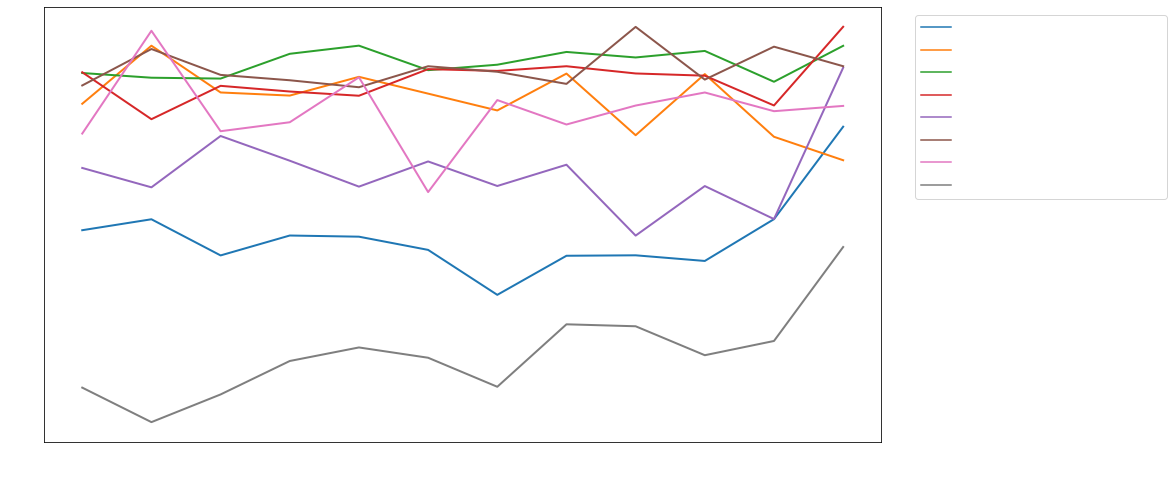

In [76]:
genre_filter = df.groupby('genres').filter(lambda x : len(x)>300).sort_values(by="release_date")
g = sns.lineplot(data=genre_filter, x=genre_filter["release_date"], y=genre_filter['score'], hue=genre_filter["genres"], ci=None,linewidth = 2)
g.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15})
fig = plt.gcf()
fig.set_size_inches(15, 8)

Top những thể loại phim được đánh giá cao từ khán giả là Drama,Romance - Drama, Comedy - Drama

## Ảnh hưởng của ngôn ngữ tới doanh thu phim là như thế nào?
- Hầu hết phim ra rạp đều có ngôn ngữ là tiếng Anh nên doanh thu của những phim tiếng Anh sẽ là lớn nhất.
- Vậy bên cạnh tiếng Anh liệu có ngôn ngữ phim nào được đón nhận hay không?

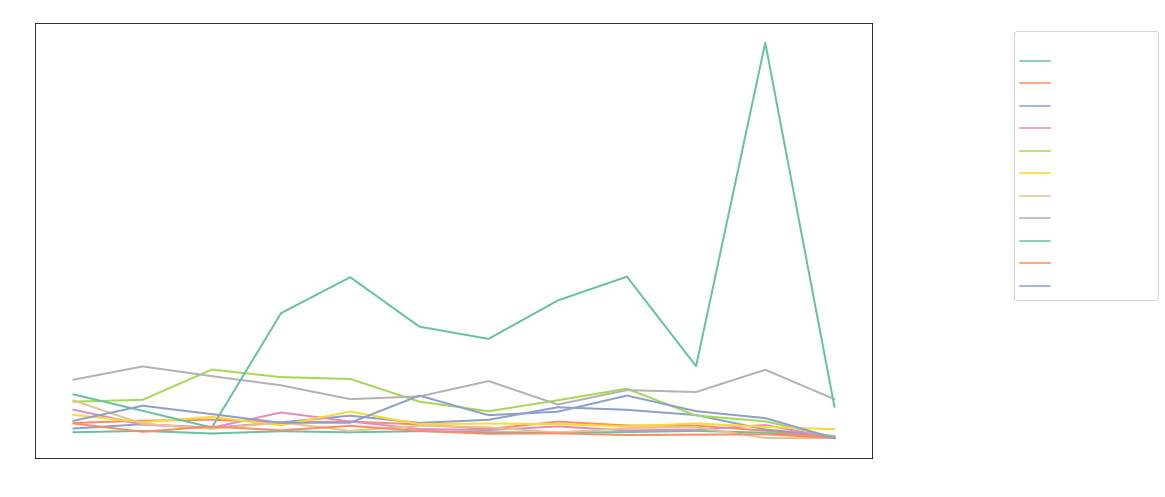

In [77]:
non_eng_movies=df[df["languages"].str.contains("English")==False]
non_eng=non_eng_movies.groupby('languages').filter(lambda x : len(x)>300).sort_values(by="release_date")

non_eng_graph=sns.lineplot(data=non_eng, x=non_eng["release_date"], y=non_eng['gross_worldwide'], hue=non_eng["languages"], ci=None,linewidth = 2, palette="Set2")
non_eng_graph.legend(loc='upper right', bbox_to_anchor=(1.35, 1), prop={'size': 15}, title="Language")
non_eng_graph.set(title="Gross worldwide of Non-English Films over the Years")

fig = plt.gcf()
fig.set_size_inches(15, 8)

- Phim có ngôn ngữ là tiếng Mandarin có doanh thu vượt trội so với những ngôn ngữ có 200 phim trở lên trong dataset. Lí giải cho điều này bởi Mandarin là tiếng phổ thông của Trung Quốc (hơn 900 triệu người sử dụng), việc có thêm ngôn ngữ này vào phim sẽ thu hút thêm người xem ở thị trường tỷ dân này.
- Phim có ngôn ngữ là tiếng Nhật có doanh thu cũng vượt trội theo sau. Lí giải cho điều nay có thể là do sự phát triển lớn mạnh của phim hoạt hình Nhật Bản (gần như bành trướng trong dòng phim hoạt hình).

## Một vài phim Việt có doanh thu cao

In [78]:
df[df.countries_of_origin.str.contains('Vietnam', na=False)][['title', 'directors', 'genres', 'release_date', 'gross_worldwide']].sort_values('gross_worldwide', ascending=False).head(10)

title            directors  \
20955                        Mắt Biếc           Victor Vu,   
17663                  Tiệc Trăng Máu   Quang Dung Nguyen,   
1156              Gai Gia Lam Chieu 3             Namcito,   
10200                      Hai Phuong         Le-Van Kiet,   
6960                   Cua Lại Vợ Bầu          Nhat Trung,   
2568    Chi Muoi Ba 2: 3 Ngay Sinh Tu        Vo Thanh Hoa,   
1983             Em La Ba Noi Cua Anh  Phan Gia Nhat Linh,   
19017  Tôi Thấy Hoa Vàng Trên Cỏ Xanh           Victor Vu,   
16354                   Chi Chi Em Em          Kathy Uyen,   
7523                          49 Ngày          Nhat Trung,   

                       genres  release_date  gross_worldwide  
20955          Drama,Romance,        2019.0        7061163.0  
17663           Comedy,Drama,        2020.0        6709383.0  
1156                  Comedy,        2020.0        5830719.0  
10200  Action,Drama,Thriller,        2019.0        5756185.0  
6960   Comedy,Family,Romance,        2019.0        5564332.0  
2568           Action,Comedy,        2020.0        4257126.0  
1983            Comedy,Music,        2015.0        3810429.0  
19017                  Drama,        2015.0        3293667.0  
16354         Drama,Thriller,        2019.0        2978284.0  
7523    Comedy,Drama,Romance,        2015.0        2904527.0